# Peer Hanna K12220447

**auxiliary percentage** is $84\%$
Solve Tasks from 1 to 25

In [1]:
import task1
import numpy as np
import sympy as sp
from sympy import symbols, Function, diff, evalf
from scipy.optimize import fsolve, minimize
from scipy.linalg import hilbert
import matplotlib.pyplot as plt
import types

# Tasks 1-10
I splitted the tasks here into 5 problems where each problem is solved 2 times. e.g Problem 1 represent task 1(Steepest Descent) & 6(Newton Method)

Declaring the Backtracking Line Search algorithem

In [2]:
def backtracking_line_search_task1(f: types.FunctionType, grad_f: types.FunctionType, x_k, p_k, alpha=0.5, rho=0.5, c=0.1):
    """
    Perform a backtracking line search to find the step size.

    Parameters:
    f: Function to minimize.
    grad_f: Gradient of the function to minimize.
    x_k: Current point in the search space.
    p_k: Descent direction.
    alpha: Initial step size (default 0.5).
    rho: Contraction factor (default 0.5).
    c: Sufficient decrease constant (default 0.1).

    Returns:
    The step size that satisfies the sufficient decrease condition.
    """
    if type(grad_f(x_k)) != np.ndarray: 
        while f(x_k + alpha * p_k) > f(x_k) + c * alpha * grad_f(x_k)* p_k:
            alpha *= rho
        return alpha

Here I delclare 2 functions addressing steepest descent and newton method algorithms for univariate problems. 

In [3]:
def newton_method_uni(x0, f:types.FunctionType, grad_f:types.FunctionType, hess_f:types.FunctionType,alpha0=1, tolerance=1e-10, max_iterations=1000):
    xs = [x0]
    alphas = [alpha0]
    for i in range(max_iterations):
        grad = grad_f(xs[i])
        hess = hess_f(xs[i])
        if hess == 0:
            raise ValueError("Hessian is zero, no inverse exists.")
        # Calculate the Newton direction
        pk = - grad / hess
        print(f"iteration {i+1} where x = {xs[i]} and grad = {grad} and hess = {hess} and pk = {pk}")
        #alphas.append(backtracking_line_search(f=f,grad_f=grad_f,x_k=xs[i],p_k=pk,alpha=alphas[i]))
        alphas.append(1)
        xs.append(xs[i] + alphas[i] * pk)
        #if abs(x_new - temp_x) < tolerance or abs(grad_f(x_new)) < tolerance:
        if abs(grad_f(xs[i+1])) < tolerance:
            print(f"Converged after {i+1} iterations.")
            return xs, alphas
    raise ValueError("Maximum iterations exceeded.")

def steepest_descent_uni(x0,f:types.FunctionType,grad_f:types.FunctionType, hess_f:types.FunctionType,alpha0=0.5,tolerance=1e-10,max_iterations=1000):
    xs=[x0]
    alphas=[alpha0]
    for i in range(max_iterations):
    # Stopping criterion
        if abs(grad_f(xs[i])) <= tolerance:
            print(f"Converged after {i+1} iterations.")
            return xs, alphas
    # Calculating the descent direction pk
        pk = -grad_f(xs[i])
        print(f"\niteration {i+1} where alpha = {alphas[i]} and x = {xs[i]}")
    # Updating the value of x and alpha
        xs.append(xs[i] + alphas[i]*pk)
        alphas.append(backtracking_line_search_task1(f,grad_f,x_k=xs[i],p_k=pk,alpha=alphas[i]))


## 1. Problem
$$f(x)=x^{3}+3x^{2} +2x+4$$
$$f'(x)=3x^{2}+6x+2$$
$$f''(x)=6x+6$$

The local Minima is $x^*=-0.422649730810374$

the function is:


x**3 + 3*x**2 + 2*x + 4

the first derivative is:


3*x**2 + 6*x + 2

the second derivative is:


6*x + 6

critical points are:[-1 - sqrt(3)/3, -1 + sqrt(3)/3]
the point -1.57735026918963 is a local maximum
the point -0.422649730810374 is a local minimum


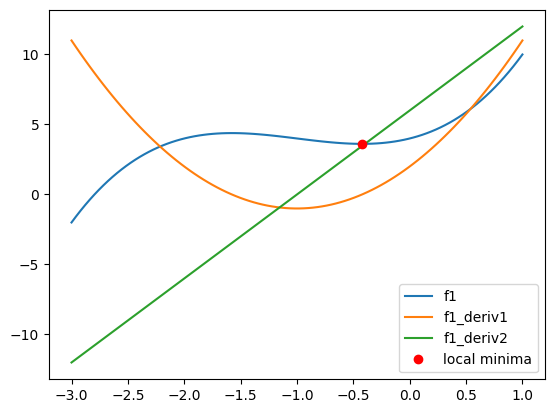

In [4]:
x, alpha = symbols('x alpha', real=True)
f1=Function('f1')(x)
f1=task1.function1(x)
print("the function is:")
display(f1)
print("the first derivative is:")
f1_deriv1=diff(f1,x)
display(f1_deriv1)
print("the second derivative is:")
f1_deriv2=diff(f1_deriv1,x)
display(f1_deriv2)

critical_points = sp.solve(f1_deriv1,x)
print(f"critical points are:{critical_points}")
x_star = []
for point in critical_points:
    if f1_deriv2.evalf(subs={x:point})>0:
        x_star.append(point)
        print(f"the point {point.evalf()} is a local minimum")
    elif f1_deriv2.evalf(subs={x:point})<0:
        print(f"the point {point.evalf()} is a local maximum")
    else:
        print(f"the point {point.evalf()} is a saddle point")


#plotting the function and its derivatives
x_vals=np.linspace(-3,1,100)
f1_vals=[f1.subs(x,val) for val in x_vals]
f1_deriv1_vals=[f1_deriv1.subs(x,val) for val in x_vals]
f1_deriv2_vals=[f1_deriv2.subs(x,val) for val in x_vals]

plt.plot(x_vals,f1_vals,label='f1')
plt.plot(x_vals,f1_deriv1_vals,label='f1_deriv1')
plt.plot(x_vals,f1_deriv2_vals,label='f1_deriv2')
plt.plot(x_star,[f1.evalf(subs={x:val}) for val in x_star],'ro',label='local minima')
plt.legend()
plt.show()

### Applying steepest descent

In [5]:
x0 = 0
f = sp.lambdify(x,f1)
grad_f = sp.lambdify(x,f1_deriv1)
hess_f = sp.lambdify(x,f1_deriv2)
xs , alphas = steepest_descent_uni( x0=x0, f=f, grad_f=grad_f, hess_f=hess_f,tolerance=10**-6)
print()
print(f"the value of x_telda is {xs[-1]}")
print(f"the value of the gradient is {abs(f1_deriv1.evalf(subs={x:xs[-1]}))}")
print(f"the value of ||x-x*|| is {abs(xs[-1]-x_star[0].evalf())}")
alphas



iteration 1 where alpha = 0.5 and x = 0

iteration 2 where alpha = 0.25 and x = -1.0

iteration 3 where alpha = 0.25 and x = -0.75

iteration 4 where alpha = 0.25 and x = -0.546875

iteration 5 where alpha = 0.25 and x = -0.45086669921875

iteration 6 where alpha = 0.25 and x = -0.4270272357389331

iteration 7 where alpha = 0.25 and x = -0.42325057717765924

iteration 8 where alpha = 0.25 and x = -0.42273049972208676

iteration 9 where alpha = 0.25 and x = -0.4226605566854206

iteration 10 where alpha = 0.25 and x = -0.42265118129051193
Converged after 11 iterations.

the value of x_telda is -0.422649925139443
the value of the gradient is 6.73175527665183E-7
the value of ||x-x*|| is 1.94329068781141E-7


[0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

So we end up with after 11 iteration
$$\~x = -0.422649925139443$$
$$\Vert \nabla f(x) \Vert = 6.73175527665183\text{e}-8$$
$$||\~x-x^*|| = 1.94329068781141\text{e}-8$$


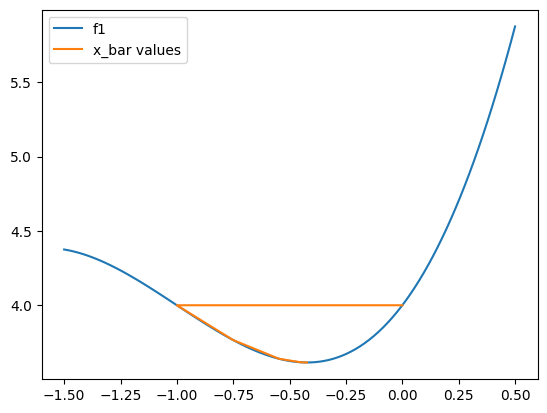

In [6]:
# plot the function and the predicted x values
x_vals=np.linspace(-1.5,0.5,100)
f1_vals=[f1.subs(x,val) for val in x_vals]
plt.plot(x_vals,f1_vals,label='f1')
plt.plot(xs,[f(val) for val in xs],label='x_bar values')
plt.legend()
plt.show()

### Applying Newton Method

In [7]:
x0 = 0
f = sp.lambdify(x,f1)
grad_f = sp.lambdify(x,f1_deriv1)
hess_f = sp.lambdify(x,f1_deriv2)
xs, alphas = newton_method_uni( x0=x0, f=f, grad_f=grad_f, hess_f=hess_f,tolerance=10**-6)
print()
print(f"the value of x_telda is {xs[-1]}")
print(f"the value of the gradient is {abs(f1_deriv1.evalf(subs={x:xs[-1]}))}")
print(f"the value of ||x-x*|| is {abs(xs[-1]-x_star[0].evalf())}")
alphas


iteration 1 where x = 0 and grad = 2 and hess = 6 and pk = -0.3333333333333333
iteration 2 where x = -0.3333333333333333 and grad = 0.33333333333333326 and hess = 4.0 and pk = -0.08333333333333331
iteration 3 where x = -0.41666666666666663 and grad = 0.02083333333333326 and hess = 3.5 and pk = -0.005952380952380931
iteration 4 where x = -0.42261904761904756 and grad = 0.00010629251700677855 and hess = 3.4642857142857144 and pk = -3.0682376043193805e-05
Converged after 4 iterations.

the value of x_telda is -0.42264972999509076
the value of the gradient is 2.82422480079999E-9
the value of ||x-x*|| is 8.15283451860438E-10


[1, 1, 1, 1, 1]

So we end up with
$$\~x = -0.42264972999509076$$
$$\Vert \nabla f(x) \Vert = 2.82422480079999\text{e}-8$$
$$||\~x-x^*|| = 8.15283451860438\text{e}-8$$


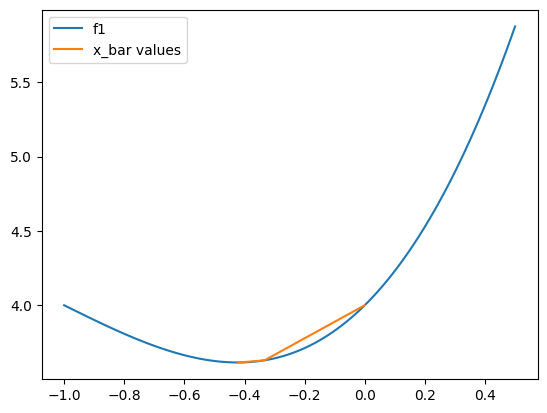

In [8]:
# plot the function and the predicted x values
x_vals=np.linspace(-1,0.5,100)
f1_vals=[f1.subs(x,val) for val in x_vals]
plt.plot(x_vals,f1_vals,label='f1')
plt.plot(xs,[f(val) for val in xs],label='x_bar values')
plt.legend()
plt.show()

## 2. Problem
$$f(x) = x^3 + 2x^2 - 5x + 3$$
$$f'(x) = 3x^2 + 4x - 5$$
$$f''(x) = 6x + 4$$

Local Minimum $x^* = 0.786299647846891$


the function is:


x**3 + 2*x**2 - 5*x + 3

the first derivative is:


3*x**2 + 4*x - 5

the second derivative is:


6*x + 4

critical points are:[-2/3 + sqrt(19)/3, -sqrt(19)/3 - 2/3]
the point 0.786299647846891 is a local minimum
the point -2.11963298118022 is a local maximum


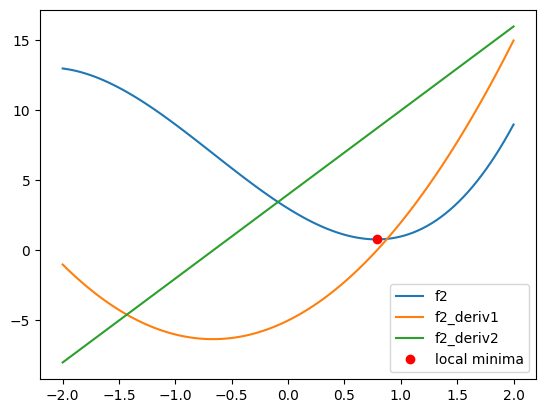

In [9]:
x, alpha = symbols('x alpha', real=True)
f2=Function('f2')(x)
f2=task1.function2(x)
print("the function is:")
display(f2)
print("the first derivative is:")
f2_deriv1=diff(f2,x)
display(f2_deriv1)
print("the second derivative is:")
f2_deriv2=diff(f2_deriv1,x)
display(f2_deriv2)

critical_points = sp.solve(f2_deriv1,x)
print(f"critical points are:{critical_points}")
x_star = []
for point in critical_points:
    if f2_deriv2.evalf(subs={x:point})>0:
        x_star.append(point)
        print(f"the point {point.evalf()} is a local minimum")
    elif f2_deriv2.evalf(subs={x:point})<0:
        print(f"the point {point.evalf()} is a local maximum")
    else:
        print(f"the point {point.evalf()} is a saddle point")


#plotting the function and its derivatives
x_vals=np.linspace(-2,2,100)
f2_vals=[f2.subs(x,val) for val in x_vals]
f2_deriv1_vals=[f2_deriv1.subs(x,val) for val in x_vals]
f2_deriv2_vals=[f2_deriv2.subs(x,val) for val in x_vals]

plt.plot(x_vals,f2_vals,label='f2')
plt.plot(x_vals,f2_deriv1_vals,label='f2_deriv1')
plt.plot(x_vals,f2_deriv2_vals,label='f2_deriv2')
plt.plot(x_star,[f2.evalf(subs={x:val}) for val in x_star],'ro',label='local minima')
plt.legend()
plt.show()

### Applying steepest descent

In [10]:
x0 = 0
f = sp.lambdify(x,f2)
grad_f = sp.lambdify(x,f2_deriv1)
hess_f = sp.lambdify(x,f2_deriv2)
xs , alphas = steepest_descent_uni( x0=x0, f=f, grad_f=grad_f, hess_f=hess_f,tolerance=10**-6,alpha0=0.6)
print()
print(f"the value of x_telda is {xs[-1]}")
print(f"the value of the gradient is {abs(f2_deriv1.evalf(subs={x:xs[-1]}))}")
print(f"the value of ||x-x*|| is {abs(xs[-1]-x_star[0].evalf())}")


iteration 1 where alpha = 0.6 and x = 0

iteration 2 where alpha = 0.15 and x = 3.0

iteration 3 where alpha = 0.15 and x = -2.0999999999999996

iteration 4 where alpha = 0.15 and x = -2.074499999999999

iteration 5 where alpha = 0.15 and x = -2.016397612499998

iteration 6 where alpha = 0.15 and x = -1.8861957442630601

iteration 7 where alpha = 0.15 and x = -1.60545877125946

iteration 8 where alpha = 0.15 and x = -1.0520575483000547

iteration 9 where alpha = 0.15 and x = -0.1688943075408268

iteration 10 where alpha = 0.15 and x = 0.6696058977798063

iteration 11 where alpha = 0.15 and x = 0.8160749328582474

iteration 12 where alpha = 0.15 and x = 0.7767397399254822

iteration 13 where alpha = 0.15 and x = 0.7891998153594152

iteration 14 where alpha = 0.15 and x = 0.7854035692902652

iteration 15 where alpha = 0.15 and x = 0.7865749827218562

iteration 16 where alpha = 0.15 and x = 0.7862149015389926

iteration 17 where alpha = 0.15 and x = 0.7863257184847116

iteration 18 where

So we end up with after 21 iteration
$$\~x = 0.7862995759702333$$
$$\Vert \nabla f(x) \Vert = 6.26606161121998\text{e}-8$$
$$||\~x-x^*|| = 7.18766579588248\text{e}-8$$


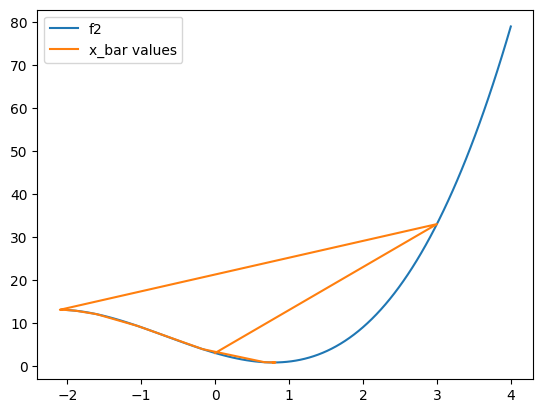

In [11]:
x_vals=np.linspace(-2,4,100)
f2_vals=[f2.subs(x,val) for val in x_vals]
plt.plot(x_vals,f2_vals,label='f2')
plt.plot(xs,[f(val) for val in xs],label='x_bar values')
plt.legend()
plt.show()

### Applying Newton Method

In [12]:
x0 = 0
f = sp.lambdify(x,f2)
grad_f = sp.lambdify(x,f2_deriv1)
hess_f = sp.lambdify(x,f2_deriv2)
xs, alphas = newton_method_uni( x0=x0, f=f, grad_f=grad_f, hess_f=hess_f,tolerance=10**-6)
print()
print(f"the value of x_telda is {xs[-1]}")
print(f"the value of the gradient is {abs(f2_deriv1.evalf(subs={x:xs[-1]}))}")
print(f"the value of ||x-x*|| is {abs(xs[-1]-x_star[0].evalf())}")
alphas

iteration 1 where x = 0 and grad = -5 and hess = 4 and pk = 1.25
iteration 2 where x = 1.25 and grad = 4.6875 and hess = 11.5 and pk = -0.4076086956521739
iteration 3 where x = 0.8423913043478262 and grad = 0.4984345463138 and hess = 9.054347826086957 and pk = -0.05504919359047971
iteration 4 where x = 0.7873421107573465 and grad = 0.009091241144886908 and hess = 8.724052664544079 and pk = -0.0010420892095063961
iteration 5 where x = 0.7863000215478401 and grad = 3.2578497615176616e-06 and hess = 8.71780012928704 and pk = -3.737009008239439e-07
Converged after 5 iterations.

the value of x_telda is 0.7862996478469393
the value of the gradient is 4.19350858736310E-13
the value of ||x-x*|| is 4.80726569662693E-14


[1, 1, 1, 1, 1, 1]

So we end up with after 5 iteration
$$\~x = 0.7862996478469393$$
$$\Vert \nabla f(x) \Vert = 4.1935085873631\text{e}-13$$
$$||\~x-x^*|| = 4.80726569662693\text{e}-8$$

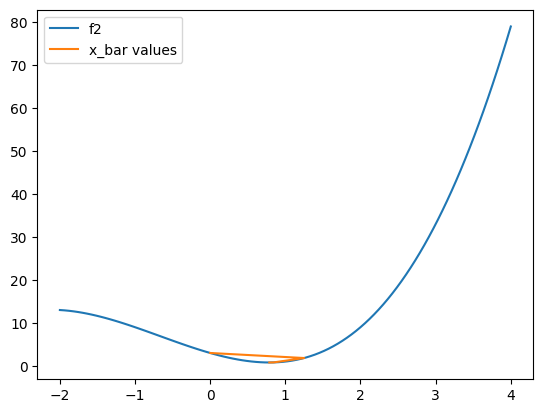

In [13]:
x_vals=np.linspace(-2,4,100)
f2_vals=[f2.subs(x,val) for val in x_vals]
plt.plot(x_vals,f2_vals,label='f2')
plt.plot(xs,[f(val) for val in xs],label='x_bar values')
plt.legend()
plt.show()

## 3. Problem
$$f(x) = 2x^{3}+4x^{2} -13x+3$$ 
$$f'(x) = 6x^2 + 8x - 13 $$
$$f''(x) = 12x^2+8$$
Local minima $x^*= 0.949226619138776$

the function is:


2*x**3 + 4*x**2 - 13*x + 3

the first derivative is:


6*x**2 + 8*x - 13

the second derivative is:


12*x + 8

critical points are:[-2/3 + sqrt(94)/6, -sqrt(94)/6 - 2/3]
the point 0.949226619138776 is a local minimum
the point -2.28255995247211 is a local maximum


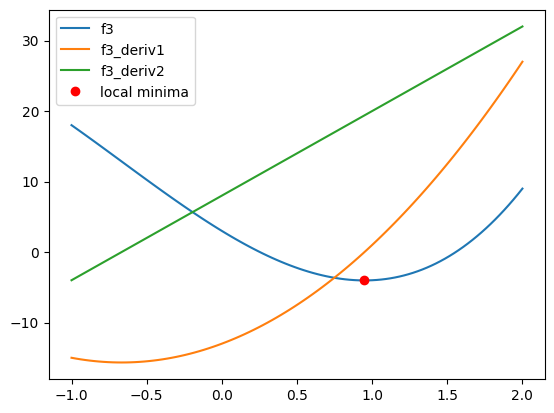

In [14]:
x, alpha = symbols('x alpha', real=True)
f3=Function('f3')(x)
f3=task1.function3(x)
print("the function is:")
display(f3)
print("the first derivative is:")
f3_deriv1=diff(f3,x)
display(f3_deriv1)
print("the second derivative is:")
f3_deriv2=diff(f3_deriv1,x)
display(f3_deriv2)

critical_points = sp.solve(f3_deriv1,x)
print(f"critical points are:{critical_points}")
x_star = []
for point in critical_points:
    if f3_deriv2.evalf(subs={x:point})>0:
        x_star.append(point)
        print(f"the point {point.evalf()} is a local minimum")
    elif f3_deriv2.evalf(subs={x:point})<0:
        print(f"the point {point.evalf()} is a local maximum")
    else:
        print(f"the point {point.evalf()} is a saddle point")


#plotting the function and its derivatives
x_vals=np.linspace(-1,2,100)
f3_vals=[f3.subs(x,val) for val in x_vals]
f3_deriv1_vals=[f3_deriv1.subs(x,val) for val in x_vals]
f3_deriv2_vals=[f3_deriv2.subs(x,val) for val in x_vals]

plt.plot(x_vals,f3_vals,label='f3')
plt.plot(x_vals,f3_deriv1_vals,label='f3_deriv1')
plt.plot(x_vals,f3_deriv2_vals,label='f3_deriv2')
plt.plot(x_star,[f3.evalf(subs={x:val}) for val in x_star],'ro',label='local minima')
plt.legend()
plt.show()

### Applying steepest descent

In [15]:
x0 = 0
f = sp.lambdify(x,f3)
grad_f = sp.lambdify(x,f3_deriv1)
hess_f = sp.lambdify(x,f3_deriv2)
xs , alphas = steepest_descent_uni( x0=x0, f=f, grad_f=grad_f, hess_f=hess_f,tolerance=10**-6,alpha0=0.2)
print()
print(f"the value of x_telda is {xs[-1]}")
print(f"the value of the gradient is {abs(f3_deriv1.evalf(subs={x:xs[-1]}))}")
print(f"the value of ||x-x*|| is {abs(xs[-1]-x_star[0].evalf())}")


iteration 1 where alpha = 0.2 and x = 0

iteration 2 where alpha = 0.1 and x = 2.6

iteration 3 where alpha = 0.05 and x = -2.236

iteration 4 where alpha = 0.05 and x = -2.1915088000000007

iteration 5 where alpha = 0.05 and x = -2.105718526143233

iteration 6 where alpha = 0.05 and x = -1.9436462690887888

iteration 7 where alpha = 0.05 and x = -1.649516007256104

iteration 8 where alpha = 0.05 and x = -1.1559805218118981

iteration 9 where alpha = 0.05 and x = -0.44447560312969125

iteration 10 where alpha = 0.05 and x = 0.32404706958893437

iteration 11 where alpha = 0.05 and x = 0.8129262907606079

iteration 12 where alpha = 0.05 and x = 0.9395010281934246

iteration 13 where alpha = 0.05 and x = 0.9489019623231041

iteration 14 where alpha = 0.05 and x = 0.9492166971636712

iteration 15 where alpha = 0.05 and x = 0.9492263168459101
Converged after 16 iterations.

the value of x_telda is 0.9492266099296904
the value of the gradient is 1.78570800446269E-7
the value of ||x-x*|| is 

So we end up with after 15 iteration
$$\~x = 0.9492266099296904$$
$$\Vert \nabla f(x) \Vert = 1.7857080044626\text{e}-7$$
$$||\~x-x^*|| = 9.20908593826653\text{e}-9$$


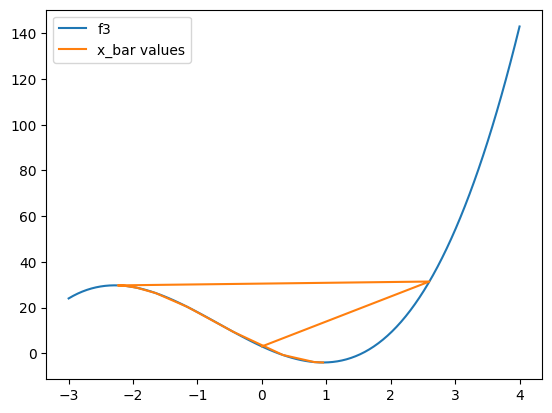

In [16]:
x_vals=np.linspace(-3,4,100)
f3_vals=[f3.subs(x,val) for val in x_vals]
plt.plot(x_vals,f3_vals,label='f3')
plt.plot(xs,[f(val) for val in xs],label='x_bar values')
plt.legend()
plt.show()

In [17]:
x0 = 0
f = sp.lambdify(x,f3)
grad_f = sp.lambdify(x,f3_deriv1)
hess_f = sp.lambdify(x,f3_deriv2)
xs, alphas = newton_method_uni( x0=x0, f=f, grad_f=grad_f, hess_f=hess_f,tolerance=10**-6)
print()
print(f"the value of x_telda is {xs[-1]}")
print(f"the value of the gradient is {abs(f3_deriv1.evalf(subs={x:xs[-1]}))}")
print(f"the value of ||x-x*|| is {abs(xs[-1]-x_star[0].evalf())}")
alphas

iteration 1 where x = 0 and grad = -13 and hess = 8 and pk = 1.625
iteration 2 where x = 1.625 and grad = 15.84375 and hess = 27.5 and pk = -0.5761363636363637
iteration 3 where x = 1.0488636363636363 and grad = 1.9915986570247917 and hess = 20.586363636363636 and pk = -0.09674358678415858
iteration 4 where x = 0.9521200495794777 and grad = 0.056155929503184154 and hess = 19.425440594953734 and pk = -0.002890844572028504
iteration 5 where x = 0.9492292050074492 and grad = 5.0141894039512636e-05 and hess = 19.390750460089393 and pk = -2.585866603910774e-06
Converged after 5 iterations.

the value of x_telda is 0.9492266191408453
the value of the gradient is 4.01181486757818E-11
the value of ||x-x*|| is 2.06890060638898E-12


[1, 1, 1, 1, 1, 1]

### Appltying Newton Method

In [18]:
x0 = 0
f = sp.lambdify(x,f3)
grad_f = sp.lambdify(x,f3_deriv1)
hess_f = sp.lambdify(x,f3_deriv2)
xs, alphas = newton_method_uni( x0=x0, f=f, grad_f=grad_f, hess_f=hess_f,tolerance=10**-6)
print()
print(f"the value of x_telda is {xs[-1]}")
print(f"the value of the gradient is {abs(f3_deriv1.evalf(subs={x:xs[-1]}))}")
print(f"the value of ||x-x*|| is {abs(xs[-1]-x_star[0].evalf())}")
alphas

iteration 1 where x = 0 and grad = -13 and hess = 8 and pk = 1.625
iteration 2 where x = 1.625 and grad = 15.84375 and hess = 27.5 and pk = -0.5761363636363637
iteration 3 where x = 1.0488636363636363 and grad = 1.9915986570247917 and hess = 20.586363636363636 and pk = -0.09674358678415858
iteration 4 where x = 0.9521200495794777 and grad = 0.056155929503184154 and hess = 19.425440594953734 and pk = -0.002890844572028504
iteration 5 where x = 0.9492292050074492 and grad = 5.0141894039512636e-05 and hess = 19.390750460089393 and pk = -2.585866603910774e-06
Converged after 5 iterations.

the value of x_telda is 0.9492266191408453
the value of the gradient is 4.01181486757818E-11
the value of ||x-x*|| is 2.06890060638898E-12


[1, 1, 1, 1, 1, 1]

So we end up with after 5 iteration
$$\~x = 0.9492266191408453$$
$$\Vert \nabla f(x) \Vert = 4.01181486757818\text{e}-11$$
$$||\~x-x^*|| = 2.06890060638898\text{e}-12$$

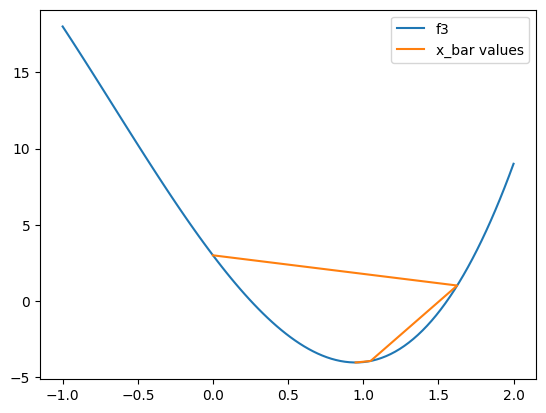

In [19]:
x_vals=np.linspace(-1,2,100)
f3_vals=[f3.subs(x,val) for val in x_vals]
plt.plot(x_vals,f3_vals,label='f3')
plt.plot(xs,[f(val) for val in xs],label='x_bar values')
plt.legend()
plt.show()

## 4. Problem
$$f(x) = -x^5 + 5x^3 - 3x^2 + 7$$
$$f'(x) = -5x^4 + 15x^2 - 6x$$
$$f''(x) = -20x^3 + 30x - 6$$


the function is:


-x**5 + 5*x**3 - 3*x**2 + 7

the first derivative is:


-5*x**4 + 15*x**2 - 6*x

the second derivative is:


-20*x**3 + 30*x - 6

critical points are:[0, array([0.]), array([-1.90521644]), array([1.47949789]), array([0.42571855])]
the point 0 is a local maximum
the point [0.] is a local maximum
the point [-1.90521644] is a local minimum
the point [1.47949789] is a local maximum
the point [0.42571855] is a local minimum


C:\Users\Bashar Hanna\AppData\Local\Temp\ipykernel_10352\4250903845.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if f4_deriv2.evalf(subs={x:float(point)})>0:
C:\Users\Bashar Hanna\AppData\Local\Temp\ipykernel_10352\4250903845.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  elif f4_deriv2.evalf(subs={x:float(point)})<0:
C:\Users\Bashar Hanna\AppData\Local\Temp\ipykernel_10352\4250903845.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(x_sta

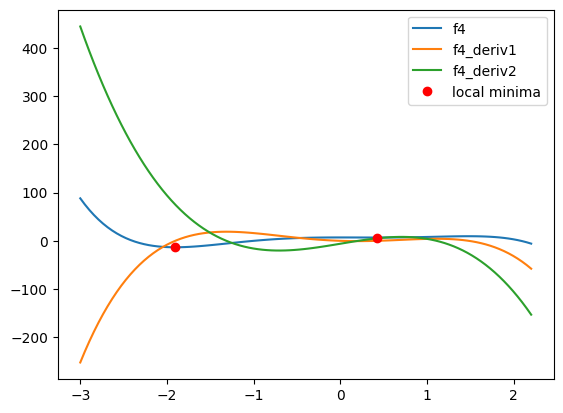

In [20]:
x =symbols('x', real=True)
f4=Function('f4')(x)
f4=task1.function4(x)
print("the function is:")
display(f4)
print("the first derivative is:")
f4_deriv1=diff(f4,x)
display(f4_deriv1)
print("the second derivative is:")
f4_deriv2=diff(f4_deriv1,x)
display(f4_deriv2)

critical_points = [sol for sol in sp.solve(f4_deriv1.factor().simplify(),x) if sol.is_real]
initial_guesses = [0, -2, 1.5, 0.5]
for guess in initial_guesses:
    critical_points.append(fsolve(sp.lambdify(x,f4_deriv1),guess))
print(f"critical points are:{critical_points}")
x_star = []
for point in critical_points:
        if f4_deriv2.evalf(subs={x:float(point)})>0:
            x_star.append(point)
            print(f"the point {point} is a local minimum")
        elif f4_deriv2.evalf(subs={x:float(point)})<0:
            print(f"the point {point} is a local maximum")
        else:
            print(f"the point {point} is a saddle point")


#plotting the function and its derivatives
x_vals=np.linspace(-3,2.2,100)
f4_vals=[f4.subs(x,val) for val in x_vals]
f4_deriv1_vals=[f4_deriv1.subs(x,val) for val in x_vals]
f4_deriv2_vals=[f4_deriv2.subs(x,val) for val in x_vals]

plt.plot(x_vals,f4_vals,label='f4')
plt.plot(x_vals,f4_deriv1_vals,label='f4_deriv1')
plt.plot(x_vals,f4_deriv2_vals,label='f4_deriv2')
plt.plot(x_star,[f4.evalf(subs={x:float(val)}) for val in x_star],'ro',label='local minima')
plt.legend()
plt.show()

### Applying steepest descent

In [21]:
x0 = 1.3
f = sp.lambdify(x,f4)
grad_f = sp.lambdify(x,f4_deriv1)
hess_f = sp.lambdify(x,f4_deriv2)
xs , alphas = steepest_descent_uni( x0=x0, f=f, grad_f=grad_f, hess_f=hess_f,tolerance=10**-6,alpha0=0.1)
print()
print(f"the value of x_telda is {xs[-1]}")
print(f"the value of the gradient is {abs(f4_deriv1.evalf(subs={x:xs[-1]}))}")
print(f"the value of ||x-x*|| is {abs(xs[-1]-float(x_star[1]))}")


iteration 1 where alpha = 0.1 and x = 1.3

iteration 2 where alpha = 0.1 and x = 0.9730500000000003

iteration 3 where alpha = 0.1 and x = 0.5848805698029109

iteration 4 where alpha = 0.1 and x = 0.481192160000688

iteration 5 where alpha = 0.1 and x = 0.44939536444195627

iteration 6 where alpha = 0.1 and x = 0.43649144479730073

iteration 7 where alpha = 0.1 and x = 0.4307489857640124

iteration 8 where alpha = 0.1 and x = 0.42809475987653595

iteration 9 where alpha = 0.1 and x = 0.4268469833854277

iteration 10 where alpha = 0.1 and x = 0.42625577144462945

iteration 11 where alpha = 0.1 and x = 0.4259746119494738

iteration 12 where alpha = 0.1 and x = 0.4258406682815773

iteration 13 where alpha = 0.1 and x = 0.4257768047322427

iteration 14 where alpha = 0.1 and x = 0.425746342893495

iteration 15 where alpha = 0.1 and x = 0.4257318103616024

iteration 16 where alpha = 0.1 and x = 0.425724876652475

iteration 17 where alpha = 0.1 and x = 0.4257215683238905

iteration 18 where 

C:\Users\Bashar Hanna\AppData\Local\Temp\ipykernel_10352\3373539896.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"the value of ||x-x*|| is {abs(xs[-1]-float(x_star[1]))}")


With the starting point $x=1$, we end up with after 21 iteration
$$\~x = 0.4257187056690117$$
$$\Vert \nabla f(x) \Vert = 8.18264678477648\text{e}-7$$
$$||\~x-x^*|| =  1.565024925764824\text{e}-7$$


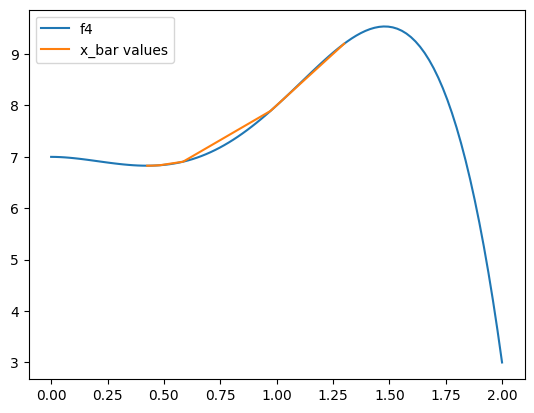

In [22]:
x_vals=np.linspace(0,2,100)
f4_vals=[f4.subs(x,val) for val in x_vals]
plt.plot(x_vals,f4_vals,label='f4')
plt.plot(xs,[f(val) for val in xs],label='x_bar values')
plt.legend()
plt.show()

### Applying Newton Method

In [23]:
x0 = 1
f = sp.lambdify(x,f4)
grad_f = sp.lambdify(x,f4_deriv1)
hess_f = sp.lambdify(x,f4_deriv2)
xs, alphas = newton_method_uni( x0=x0, f=f, grad_f=grad_f, hess_f=hess_f,tolerance=10**-6,alpha0=0.1)
print()
print(f"the value of x_telda is {xs[-1]}")
print(f"the value of the gradient is {abs(f4_deriv1.evalf(subs={x:xs[-1]}))}")
print(f"the value of ||x-x*|| is {abs(xs[-1]-float(x_star[1]))}")
alphas

iteration 1 where x = 1 and grad = 4 and hess = 4 and pk = -1.0
iteration 2 where x = 0.9 and grad = 3.4695 and hess = 6.419999999999998 and pk = -0.5404205607476638
iteration 3 where x = 0.35957943925233626 and grad = -0.30160509201415175 and hess = 3.857529639010627 and pk = 0.07818607249677723
iteration 4 where x = 0.4377655117491135 and grad = 0.06435973067459155 and hess = 5.455109577572493 and pk = -0.011798063771109696
iteration 5 where x = 0.4259674479780038 and grad = 0.0013019456762637382 and hess = 5.233202336901181 and pk = -0.00024878565598032655
Converged after 5 iterations.

the value of x_telda is 0.4257186623220235
the value of the gradient is 5.91627286805269E-7
the value of ||x-x*|| is 1.1315550435542221e-07


C:\Users\Bashar Hanna\AppData\Local\Temp\ipykernel_10352\3054935888.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"the value of ||x-x*|| is {abs(xs[-1]-float(x_star[1]))}")


[0.1, 1, 1, 1, 1, 1]

For some reason the algorithem is performing poorly in a way that it doesn't land on a local minimizer starting at $x=0$ and $\alpha = 1$. But when Setting $x=1$ and $\alpha=0.1$ we get:
$$\~x =0.4257186623220235$$
$$\Vert \nabla f(x) \Vert = 5.91627286805269\text{e}-7$$
$$||\~x-x^*|| = 1.1315550435542221\text{e}-8$$

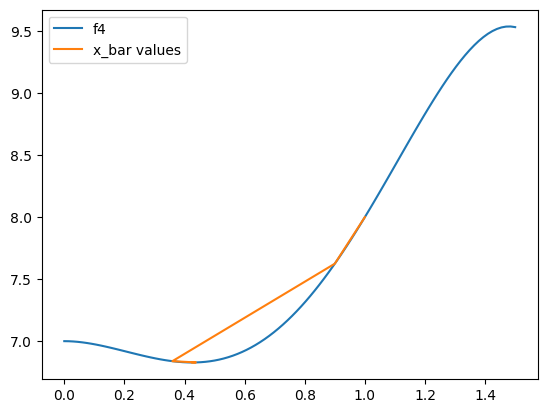

In [24]:
x_vals=np.linspace(0,1.5,100)
f4_vals=[f4.subs(x,val) for val in x_vals]
plt.plot(x_vals,f4_vals,label='f4')
plt.plot(xs,[f(val) for val in xs],label='x_bar values')
plt.legend()
plt.show()

## 5. Problem
$$f(x) = x^4 + 2x^3 - x + 1 $$
$$f'(x) = 4x^3 +6x^2 - 1 $$
$$f''(x) = 12x^2 + 12x$$


the function is:


x**4 + 2*x**3 - x + 1

the first derivative is:


4*x**3 + 6*x**2 - 1

the second derivative is:


12*x**2 + 12*x

critical points are:[-0.500000000000000, 0.366025403784439, -1.36602540378444]
the point -0.500000000000000 is a local maximum
the point 0.366025403784439 is a local minimum
the point -1.36602540378444 is a local minimum


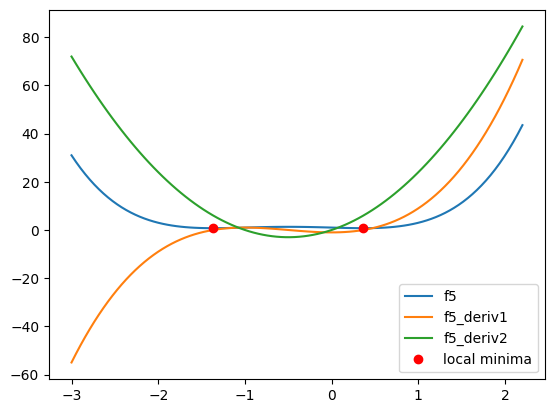

In [25]:
x =symbols('x', real=True)
f5=Function('f5')(x)
f5=task1.function5(x)
print("the function is:")
display(f5)
print("the first derivative is:")
f5_deriv1=diff(f5,x)
display(f5_deriv1)
print("the second derivative is:")
f5_deriv2=diff(f5_deriv1,x)
display(f5_deriv2)

critical_points = [sol.evalf() for sol in sp.solve(f5_deriv1.factor().simplify(),x) if sol.is_real]
""" initial_guesses = [0, -2, 1.5, 0.5]
for guess in initial_guesses:
    critical_points.append(fsolve(sp.lambdify(x,f5_deriv1),guess)) """
print(f"critical points are:{critical_points}")
x_star = []
for point in critical_points:
        if f5_deriv2.evalf(subs={x:point.evalf()})>0:
            x_star.append(point)
            print(f"the point {point} is a local minimum")
        elif f5_deriv2.evalf(subs={x:point.evalf()})<0:
            print(f"the point {point} is a local maximum")
        else:
            print(f"the point {point} is a saddle point")


#plotting the function and its derivatives
x_vals=np.linspace(-3,2.2,100)
f5_vals=[f5.subs(x,val) for val in x_vals]
f5_deriv1_vals=[f5_deriv1.subs(x,val) for val in x_vals]
f5_deriv2_vals=[f5_deriv2.subs(x,val) for val in x_vals]

plt.plot(x_vals,f5_vals,label='f5')
plt.plot(x_vals,f5_deriv1_vals,label='f5_deriv1')
plt.plot(x_vals,f5_deriv2_vals,label='f5_deriv2')
plt.plot(x_star,[f5.evalf(subs={x:val.evalf()}) for val in x_star],'ro',label='local minima')
plt.legend()
plt.show()

### Applying steepest descent

In [26]:
x0 = 0
f = sp.lambdify(x,f5)
grad_f = sp.lambdify(x,f5_deriv1)
hess_f = sp.lambdify(x,f5_deriv2)
xs , alphas = steepest_descent_uni( x0=x0, f=f, grad_f=grad_f, hess_f=hess_f,tolerance=10**-6,alpha0=0.2)
print()
print(f"the value of x_telda is {xs[-1]}")
print(f"the value of the gradient is {abs(f5_deriv1.evalf(subs={x:xs[-1]}))}")
print(f"the value of ||x-x*|| is {abs(xs[-1]-x_star[0].evalf())}")


iteration 1 where alpha = 0.2 and x = 0

iteration 2 where alpha = 0.2 and x = 0.2

iteration 3 where alpha = 0.2 and x = 0.3456

iteration 4 where alpha = 0.2 and x = 0.3692501737472

iteration 5 where alpha = 0.2 and x = 0.36535880875468507

iteration 6 where alpha = 0.2 and x = 0.3661577994654347

iteration 7 where alpha = 0.2 and x = 0.36599888821383797

iteration 8 where alpha = 0.2 and x = 0.36603070543725874

iteration 9 where alpha = 0.2 and x = 0.36602434339545414

iteration 10 where alpha = 0.2 and x = 0.36602561585989846
Converged after 11 iterations.

the value of x_telda is 0.36602536136925323
the value of the gradient is 2.54491093788584E-7
the value of ||x-x*|| is 4.24151854194754E-8


So we end up with after 11 iteration
$$\~x =0.36602536136925323$$
$$\Vert \nabla f(x) \Vert = 2.54491093788584\text{e}-7$$
$$||\~x-x^*|| = 4.24151854194754\text{e}-8$$

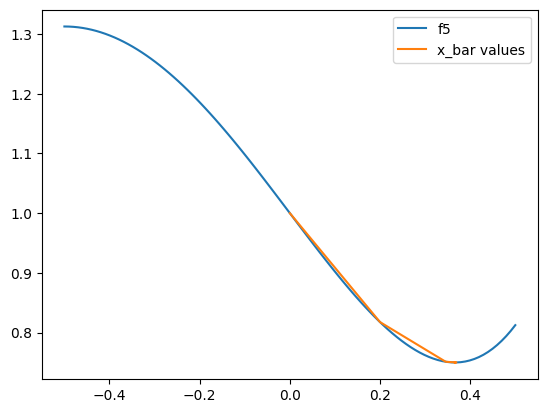

In [27]:
x_vals=np.linspace(-0.5,0.5,100)
f5_vals=[f5.subs(x,val) for val in x_vals]
plt.plot(x_vals,f5_vals,label='f5')
plt.plot(xs,[f(val) for val in xs],label='x_bar values')
plt.legend()
plt.show()

### Applying Newton Method

In [28]:
x0 = 1
f = sp.lambdify(x,f5)
grad_f = sp.lambdify(x,f5_deriv1)
hess_f = sp.lambdify(x,f5_deriv2)
xs, alphas = newton_method_uni( x0=x0, f=f, grad_f=grad_f, hess_f=hess_f,tolerance=10**-6)
print()
print(f"the value of x_telda is {xs[-1]}")
print(f"the value of the gradient is {abs(f5_deriv1.evalf(subs={x:xs[-1]}))}")
print(f"the value of ||x-x*|| is {abs(xs[-1]-x_star[0].evalf())}")
alphas

iteration 1 where x = 1 and grad = 9 and hess = 24 and pk = -0.375
iteration 2 where x = 0.625 and grad = 2.3203125 and hess = 12.1875 and pk = -0.19038461538461537
iteration 3 where x = 0.4346153846153846 and grad = 0.4617221210741922 and hess = 7.48207100591716 and pk = -0.061710470364293724
iteration 4 where x = 0.3729049142510909 and grad = 0.041770208679179355 and hess = 6.143555871884452 and pk = -0.006799028046662318
iteration 5 where x = 0.3661058862044286 and grad = 0.0004829618373474176 and hess = 6.001672873415503 and pk = -8.047120320181129e-05
Converged after 5 iterations.

the value of x_telda is 0.36602541500122676
the value of the gradient is 6.73007299962190E-8
the value of ||x-x*|| is 1.12167881094472E-8


[1, 1, 1, 1, 1, 1]

So we end up with after 5 iteration
$$\~x = 0.36602541500122676$$
$$\Vert \nabla f(x) \Vert = 6.73007299962190\text{e}-8$$
$$||\~x-x^*|| = 1.12167881094472\text{e}-12$$

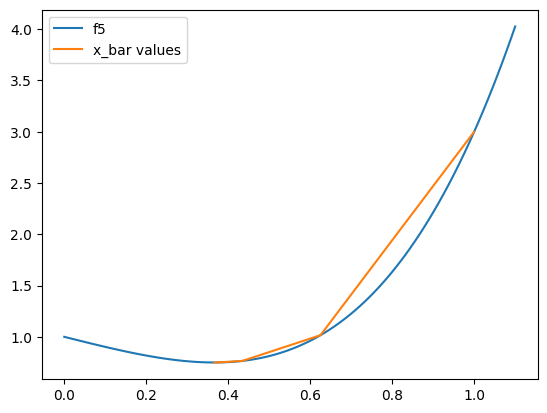

In [29]:
x_vals=np.linspace(0,1.1,100)
f5_vals=[f5.subs(x,val) for val in x_vals]
plt.plot(x_vals,f5_vals,label='f5')
plt.plot(xs,[f(val) for val in xs],label='x_bar values')
plt.legend()
plt.show()

# Tasks 11-20

For this task I splitted the tasks here into 5 problems where each problem is solved 2 times. e.g Problem 1 represent task 11(Steepest Descent) & 16(Newton Method)
Here I declared same functions as before but with some modifications and other helper function.

Note: For the SD problems I used a higher boundry for $\Vert \nabla f(x) \Vert \leq 10^{-3} in order to avoid overflow/underflow and make the loop terminate as soon as possible$

In [30]:
def backtracking_line_search_task2(f: types.FunctionType, grad_f: types.FunctionType, x_k, co, b,p_k, alpha=0.5, rho=0.8, c=0.7, max_iter=100000):
    """
    Perform a backtracking line search to find the step size.

    Parameters:
    f: Function to minimize.
    grad_f: Gradient of the function to minimize.
    x_k: Current point in the search space.
    p_k: Descent direction.
    alpha: Initial step size (default 0.5).
    rho: Contraction factor (default 0.5).
    c: Sufficient decrease constant (default 0.1).

    Returns:
    The step size that satisfies the sufficient decrease condition.
    """
    itr = 0
    while f(x=x_k + alpha * p_k,c=co,b=b)> f(x=x_k,c=co,b=b) + c * alpha * (grad_f(x=x_k,c=co,b=b).T@ p_k) and itr <= max_iter:
        if alpha < 1e-8:  # Setting a lower limit to alpha to avoid underflow
            break
        alpha *= rho
        itr += 1
    return alpha
# Function to generate data points
def generate_data(q, m,f,degree=10):
    a = np.linspace(-q, q, m)
    b = f(a)
    c = np.column_stack([a**i for i in range(degree+1)])
    return a, b, c

# Objective function
def objective_function(c, x, b):
    return 0.5 * np.sum((c@x - b)**2)

# Gradient of the objective function
def gradient(c, x, b):
    return c.T@(c@x - b)

# Hessian of the objective function
def hessian(c):
    return c.T@c

# Steepest Descent Method
def steepest_descent_task2(c, x, b, alpha, tol,rho=0.5,max_iter=100000):
    grad = gradient(c, x, b)
    itr = 0
    while np.linalg.norm(grad) > tol and itr <= max_iter:
        pk = -grad
        """ if itr % 500000 == 0:
            alpha = 1
        else: """
        alpha = backtracking_line_search_task2(objective_function, gradient, x,co=c,b=b,p_k=pk,alpha=alpha,rho=rho)
        x += alpha * pk
        grad = gradient(c, x, b)
        itr += 1
    return x, itr

# Newton Method
def newton_method_task2(c, x, b, tol):
    grad = gradient(c, x, b)
    H = hessian(c)
    while np.linalg.norm(grad) > tol:
        delta = np.linalg.solve(H, -grad)
        x += delta
        grad = gradient(c, x, b)
    return x

def taylor_series_expansion(func, var, point, order):
    """
    Compute the Taylor series expansion of a given function.

    Parameters:
    func : sympy expression
        Function to be expanded.
    var : sympy symbol
        Variable with respect to which the function is expanded.
    point : number
        The point around which the series is expanded.
    order : int
        The order of the Taylor series.

    Returns:
    sympy expression
        The Taylor series expansion of the function.
    """
    # Calculate the Taylor series
    taylor_expansion = func.series(var, point, order).removeO()
    return taylor_expansion


## 1. Problem
$$g(x)=\sin(x)$$
where the range $q=5$, the degree $n=4$ and $m=100$.

plotting the datapoints

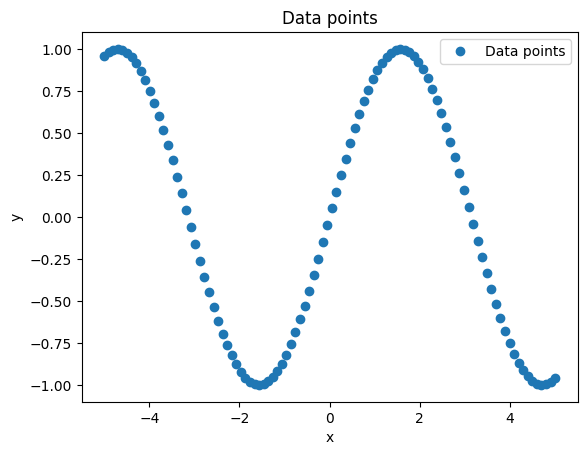

In [31]:
q = 5
m = 100
degree = 4

# Approximate the function using a polynomial of degree 4
a, b, c = generate_data(q, m, np.sin, degree=degree)
plt.plot(a, b, 'o', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.legend()
plt.show()

### Applying steepest descent

After 3053391 iterations, the coefficients are:


'x \\left(x \\left(x \\left(2.39981630703652 \\cdot 10^{-7} x - 0.0309040780410614\\right) - 6.72194848989669 \\cdot 10^{-6}\\right) + 0.411867826433361\\right) + 3.57576885006772 \\cdot 10^{-5}'

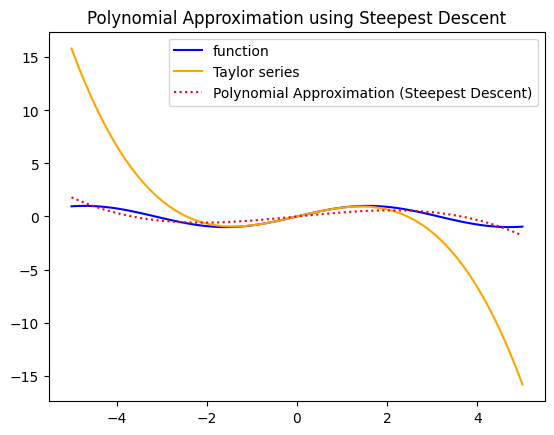

In [32]:
initial_x = np.ones(degree+1)
final_coeffs_sd, itr = steepest_descent_task2(x=initial_x, c=c, b=b,alpha= 1,tol= 10**-3,rho=0.5,max_iter=np.inf)
sd_polynomial = np.poly1d(final_coeffs_sd[::-1])
print(f"After {itr} iterations, the coefficients are:")

# Calculating the taylor series expansion of the function
x = sp.symbols('x')
func = sp.sin(x)  # Function to expand
taylor_expansion = taylor_series_expansion(func, x, 0, degree)
taylor_vals = [taylor_expansion.subs(x, val) for val in a]

aprrximation_in_latex = sp.latex(sd_polynomial(x))
display(aprrximation_in_latex)

# Plot the data points and the polynomial approximation
plt.plot(a, b, label="function", color='blue')
plt.plot(a, taylor_vals, label='Taylor series', color='orange')
plt.plot(a, sd_polynomial(a), label="Polynomial Approximation (Steepest Descent)", linestyle=':',color='red')
plt.title("Polynomial Approximation using Steepest Descent")
plt.legend()
plt.show() 

### Applying Newton Method

'x \\left(x \\left(x \\left(- 1.28785870856518 \\cdot 10^{-14} x - 0.0309040780409735\\right) + 2.83439938186802 \\cdot 10^{-13}\\right) + 0.411867826431753\\right) - 7.06323888266525 \\cdot 10^{-13}'

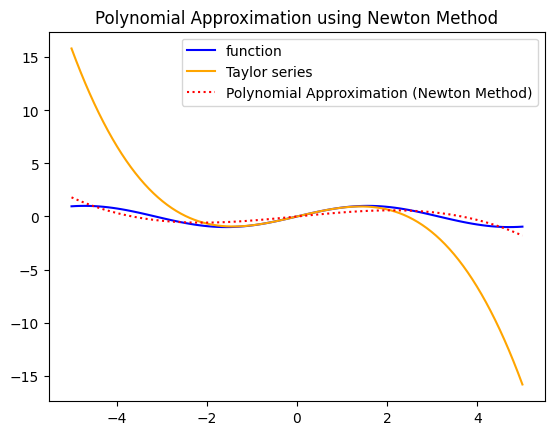

In [33]:
q = 5
m = 100
degree = 4

a, b, c = generate_data(q, m, np.sin, degree=degree)
initial_x = np.ones(degree+1)
final_coeffs_nm = newton_method_task2(c, initial_x, b, 1e-6)
nm_polynomial = np.poly1d(final_coeffs_nm[::-1])

# Calculating the taylor series expansion of the function
x = sp.symbols('x')
func = sp.sin(x)  # Function to expand
taylor_expansion = taylor_series_expansion(func, x, 0, degree)
taylor_vals = [taylor_expansion.subs(x, val) for val in a]

aprrximation_in_latex = sp.latex(nm_polynomial(x))
display(aprrximation_in_latex)

# Plot the function and the polynomial approximation
plt.plot(a, b, label="function", color='blue')
plt.plot(a, taylor_vals, label='Taylor series', color='orange')
plt.plot(a, nm_polynomial(a), label="Polynomial Approximation (Newton Method)", linestyle=':',color='red')
plt.title("Polynomial Approximation using Newton Method")
plt.legend()
plt.show()

## 2. Problem 
$$g(x)=\tan(x)$$
where the range $q=1.5$, the degree $n=5$ and $m=100$  

plotting the data points

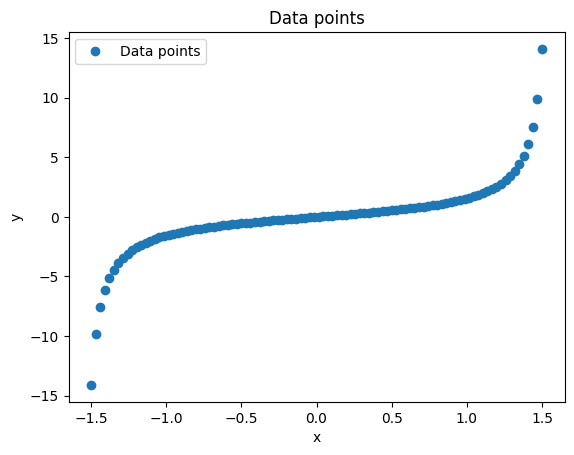

In [34]:
q = 1.5
m = 100
degree = 5
a, b, c = generate_data(q, m, np.tan, degree=degree)
plt.plot(a, b, 'o', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.legend()
plt.show()

### Applying steepest descent

After 9351 iterations


'x \\left(x \\left(x \\left(x \\left(3.00498021038537 x - 1.81370543583803 \\cdot 10^{-13}\\right) - 4.70357216254985\\right) + 3.8590701814667 \\cdot 10^{-13}\\right) + 2.70171915549237\\right) - 1.07477395039357 \\cdot 10^{-13}'

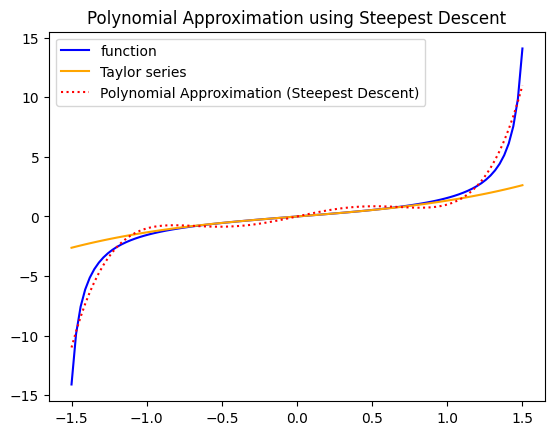

In [35]:
q = 1.5
m = 100
degree = 5

# Approximate the function using a polynomial of degree 4
a, b, c = generate_data(q, m, np.tan, degree=degree)
initial_x = np.ones(degree+1)
final_coeffs_sd, itr = steepest_descent_task2(x=initial_x, c=c, b=b,alpha= 1,tol= 10**-3,rho=0.5,max_iter=np.inf)
sd_polynomial = np.poly1d(final_coeffs_sd[::-1])
print(f"After {itr} iterations")

# Calculating the taylor series expansion of the function
x = sp.symbols('x')
func = sp.tan(x)  # Function to expand
taylor_expansion = taylor_series_expansion(func, x, 0, degree)
taylor_vals = [taylor_expansion.subs(x, val) for val in a]

aprrximation_in_latex = sp.latex(sd_polynomial(x))
display(aprrximation_in_latex)
# Plot the function and the polynomial approximation
plt.plot(a, b, label="function", color='blue')
plt.plot(a, taylor_vals, label='Taylor series', color='orange')
plt.plot(a, sd_polynomial(a), label="Polynomial Approximation (Steepest Descent)", linestyle=':',color='red')
plt.title("Polynomial Approximation using Steepest Descent")
plt.legend()
plt.show() 

The approximation using SD is $$\^g(x)=x \left(x \left(x \left(x \left(3.00498021038537 x - 1.81370543583803 \cdot 10^{-13} \right) - 4.70357216254985\right) + 3.8590701814667 \cdot 10^{-13}\right) + 2.70171915549237\right) - 1.07477395039357 \cdot 10^{-13}$$

### Applying Newton Method

'x \\left(x \\left(x \\left(x \\left(3.00530352838705 x + 1.40998324127395 \\cdot 10^{-14}\\right) - 4.70444936733329\\right) - 2.8199664825479 \\cdot 10^{-14}\\right) + 2.70220333002801\\right) + 5.55111512312578 \\cdot 10^{-15}'

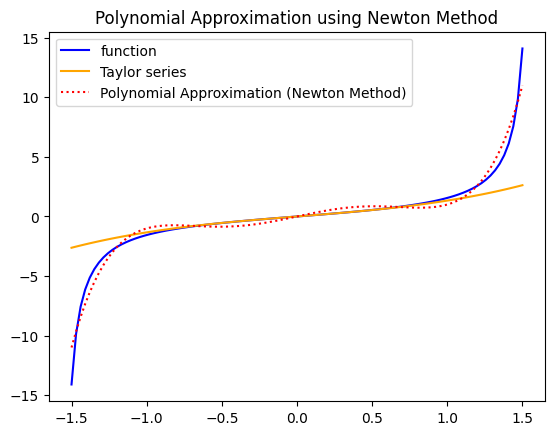

In [36]:
q = 1.5
m = 100
degree = 5

a, b, c = generate_data(q, m, np.tan, degree=degree)
initial_x = np.ones(degree+1)
final_coeffs_nm = newton_method_task2(c, initial_x, b, 1e-6)
nm_polynomial = np.poly1d(final_coeffs_nm[::-1])

# Calculating the taylor series expansion of the function
x = sp.symbols('x')
func = sp.tan(x)  # Function to expand
taylor_expansion = taylor_series_expansion(func, x, 0, degree)
taylor_vals = [taylor_expansion.subs(x, val) for val in a]

aprrximation_in_latex = sp.latex(nm_polynomial(x))
display(aprrximation_in_latex)

# Plot the data points and the polynomial approximation
plt.plot(a, b, label="function", color='blue')
plt.plot(a, taylor_vals, label='Taylor series', color='orange')
plt.plot(a, nm_polynomial(a), label="Polynomial Approximation (Newton Method)", linestyle=':',color='red')
plt.title("Polynomial Approximation using Newton Method")
plt.legend()
plt.show()

The approximation using NM is $$\^g(x)=x \left(x \left(x \left(x \left(3.00530352838705 x + 1.40998324127395 \cdot 10^{-14}\right) - 4.70444936733329\right) - 2.8199664825479 \cdot 10^{-14}\right) + 2.70220333002801\right) + 5.55111512312578 \cdot 10^{-15}$$


## 3. Problem
$$g(x)=\sigma(x)=\frac{1}{1 + e^{-x}}$$
where the range $q=5$, the degree $n=3$ and $m=100$.

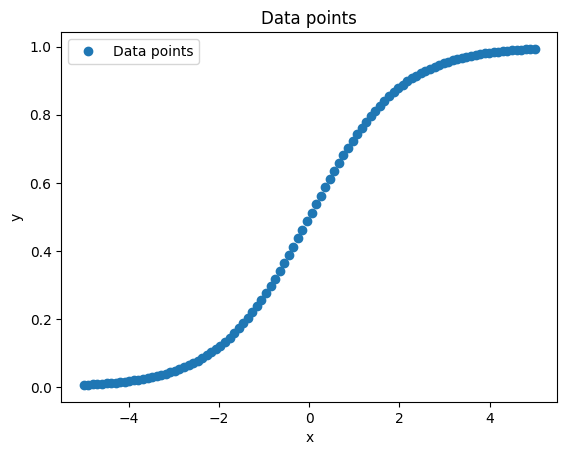

In [37]:
q = 5
m = 100
degree = 3
sigmoid = lambda x : 1/(1 + np.exp(-x))
a, b, c = generate_data(q, m, sigmoid, degree=degree)
plt.plot(a, b, 'o', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.legend()
plt.show()

### Applying steepest descent

After 116847 iterations


'x \\left(x \\left(- 0.00439092800120295 x - 1.47879288261758 \\cdot 10^{-6}\\right) + 0.197440404388855\\right) + 0.500022550030214'

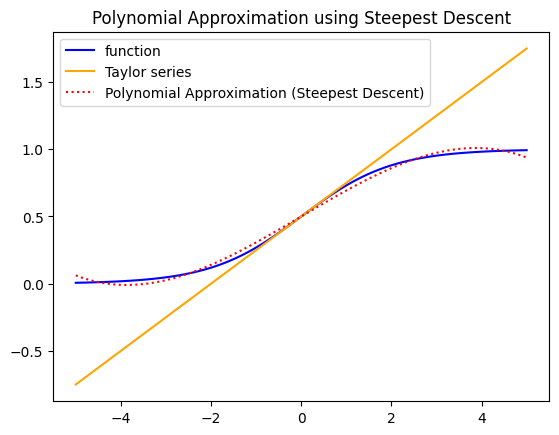

In [38]:
q = 5
m = 100
degree = 3

# Approximate the function using a polynomial of degree 4
sigmoid = lambda x : 1/(1 + np.exp(-x))
a, b, c = generate_data(q, m, sigmoid, degree=degree)
initial_x = np.ones(degree+1)
final_coeffs_sd, itr = steepest_descent_task2(x=initial_x, c=c, b=b,alpha= 1,tol= 10**-3,rho=0.5,max_iter=np.inf)
sd_polynomial = np.poly1d(final_coeffs_sd[::-1])
print(f"After {itr} iterations")

# Calculating the taylor series expansion of the function
x = sp.symbols('x')
sigmoid_symp = lambda x : 1/(1 + sp.exp(-x))
func = sigmoid_symp(x)  # Function to expand
taylor_expansion = taylor_series_expansion(func, x, 0, degree)
taylor_vals = [taylor_expansion.subs(x, val) for val in a]

aprrximation_in_latex = sp.latex(sd_polynomial(x))
display(aprrximation_in_latex)
# Plot the data points and the polynomial approximation
plt.plot(a, b, label="function", color='blue')
plt.plot(a, taylor_vals, label='Taylor series', color='orange')
plt.plot(a, sd_polynomial(a), label="Polynomial Approximation (Steepest Descent)", linestyle=':',color='red')
plt.title("Polynomial Approximation using Steepest Descent")
plt.legend()
plt.show() 

The approximation using SD is$$\^g(x)=x \left(x \left(- 0.00439092800120295 x - 1.47879288261758 \cdot 10^{-6}\right) + 0.197440404388855\right) + 0.500022550030214$$

### Applying Newton Method

'x \\left(x \\left(2.22044604925031 \\cdot 10^{-15} - 0.00439092800119889 x\\right) + 0.197440404388783\\right) + 0.499999999999981'

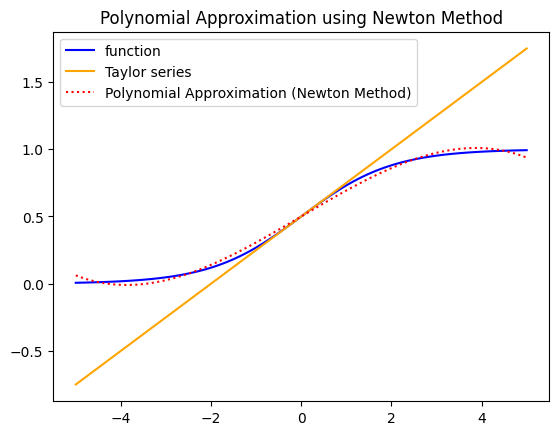

In [39]:
q = 5
m = 100
degree = 3
sigmoid = lambda x : 1/(1 + np.exp(-x))
a, b, c = generate_data(q, m, sigmoid, degree=degree)
initial_x = np.ones(degree+1)
final_coeffs_nm = newton_method_task2(c, initial_x, b, 1e-6)
nm_polynomial = np.poly1d(final_coeffs_nm[::-1])

# Calculating the taylor series expansion of the function
x = sp.symbols('x')
sigmoid_symp = lambda x : 1/(1 + sp.exp(-x))
func = sigmoid_symp(x)  # Function to expand
taylor_expansion = taylor_series_expansion(func, x, 0, degree)
taylor_vals = [taylor_expansion.subs(x, val) for val in a]

aprrximation_in_latex = sp.latex(nm_polynomial(x))
display(aprrximation_in_latex)

# Plot the data points and the polynomial approximation
plt.plot(a, b, label="function", color='blue')
plt.plot(a, taylor_vals, label='Taylor series', color='orange')
plt.plot(a, nm_polynomial(a), label="Polynomial Approximation (Newton Method)", linestyle=':',color='red')
plt.title("Polynomial Approximation using Newton Method")
plt.legend()
plt.show()

The approximation using NM is $$\^g(x)=x \left(x \left(2.22044604925031 \cdot 10^{-15} - 0.00439092800119889 x\right) + 0.197440404388783\right) + 0.499999999999981$$

## 4. Problem
$$g(x)=\text{LeakyRelu}(x)=\begin{cases} 
x & \text{if } x > 0, \\
0.1x & \text{otherwise}.
\end{cases}$$
where the range $q=5$, the degree $n=4$ and $m=100$.

plotting the data points

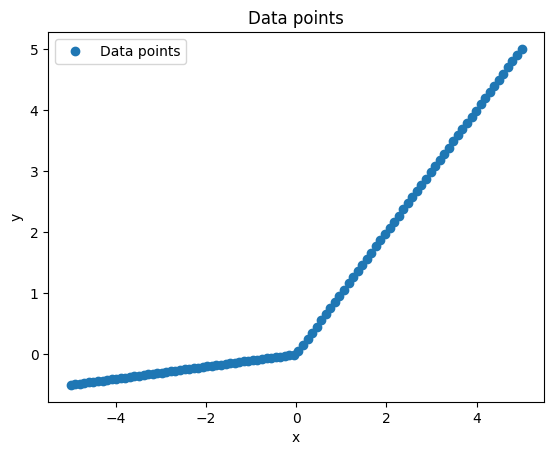

In [40]:
q = 5
m = 100
degree = 4
leakyrelu = lambda x: np.where(x > 0, x, 0.1 * x)

a, b, c = generate_data(q, m, leakyrelu, degree=degree)
plt.plot(a, b, 'o', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.legend()
plt.show()

### Applying steepest descent

After 2948122 iterations


'x \\left(x \\left(x \\left(- 0.00286804227683323 x - 1.88075346380209 \\cdot 10^{-13}\\right) + 0.146216850181593\\right) + 0.550000000003425\\right) + 0.266370984964827'

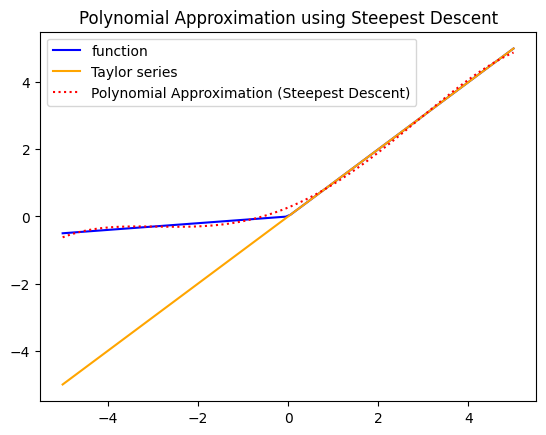

In [41]:
q = 5
m = 100
degree = 4

# Approximate the function using a polynomial of degree 4
#leakyrelu = lambda x : max(0,x) +  1e-2*min(0,x)
leakyrelu = lambda x: np.where(x > 0, x, 0.1 * x)

a, b, c = generate_data(q, m, leakyrelu, degree=degree)
initial_x = np.ones(degree+1)
final_coeffs_sd, itr = steepest_descent_task2(x=initial_x, c=c, b=b,alpha= 1,tol= 10**-3,rho=0.5,max_iter=np.inf)
sd_polynomial = np.poly1d(final_coeffs_sd[::-1])
print(f"After {itr} iterations")

# Calculating the taylor series expansion of the function
x = sp.symbols('x')
leakyrelu_symp = lambda x : sp.Piecewise((x, x > 0), (0.1 * x, True))
func = leakyrelu_symp(x)  # Function to expand
taylor_expansion = taylor_series_expansion(func, x, 0, 4)
taylor_vals = [taylor_expansion.subs(x, val) for val in a]

aprrximation_in_latex = sp.latex(sd_polynomial(x))
display(aprrximation_in_latex)
# Plot the data points and the polynomial approximation
plt.plot(a, b, label="function", color='blue')
plt.plot(a, taylor_vals, label='Taylor series', color='orange')
plt.plot(a, sd_polynomial(a), label="Polynomial Approximation (Steepest Descent)", linestyle=':',color='red')
plt.title("Polynomial Approximation using Steepest Descent")
plt.legend()
plt.show() 

The approximation using SD is $$\^g(x)=x \left(x \left(x \left(- 0.00286804227683323 x - 1.88075346380209 \cdot 10^{-13}\right) + 0.146216850181593\right) + 0.550000000003425\right) + 0.266370984964827$$

### Applying Newton Method

'x \\left(x \\left(x \\left(- 0.00286828225849578 x - 6.66133814775094 \\cdot 10^{-16}\\right) + 0.146223572130917\\right) + 0.550000000000006\\right) + 0.266335227272412'

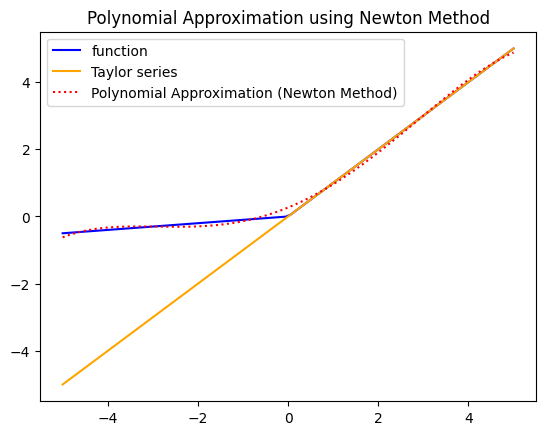

In [42]:
q = 5
m = 100
degree = 4
leakyrelu = lambda x: np.where(x > 0, x, 0.1 * x)
a, b, c = generate_data(q, m, leakyrelu, degree=degree)
initial_x = np.ones(degree+1)
final_coeffs_nm = newton_method_task2(c, initial_x, b, 1e-6)
nm_polynomial = np.poly1d(final_coeffs_nm[::-1])

# Calculating the taylor series expansion of the function
x = sp.symbols('x')
leakyrelu_symp = lambda x : sp.Piecewise((x, x > 0), (0.1 * x, True))
func = leakyrelu_symp(x)  # Function to expand
taylor_expansion = taylor_series_expansion(func, x, 0, degree)
taylor_vals = [taylor_expansion.subs(x, val) for val in a]

aprrximation_in_latex = sp.latex(nm_polynomial(x))
display(aprrximation_in_latex)

# Plot the data points and the polynomial approximation
plt.plot(a, b, label="function", color='blue')
plt.plot(a, taylor_vals, label='Taylor series', color='orange')
plt.plot(a, nm_polynomial(a), label="Polynomial Approximation (Newton Method)", linestyle=':',color='red')
plt.title("Polynomial Approximation using Newton Method")
plt.legend()
plt.show()

The approximation using NM is $$\^g(x)=x \left(x \left(x \left(- 0.00286828225849578 x - 6.66133814775094 \cdot 10^{-16}\right) + 0.146223572130917\right) + 0.550000000000006\right) + 0.266335227272412$$

## 5. Problem
$$g(x)=2\sin\left(3x-2\right)\cos\left(x\right)$$
where the range $q=2$, the degree $n=6$ and $m=150$.

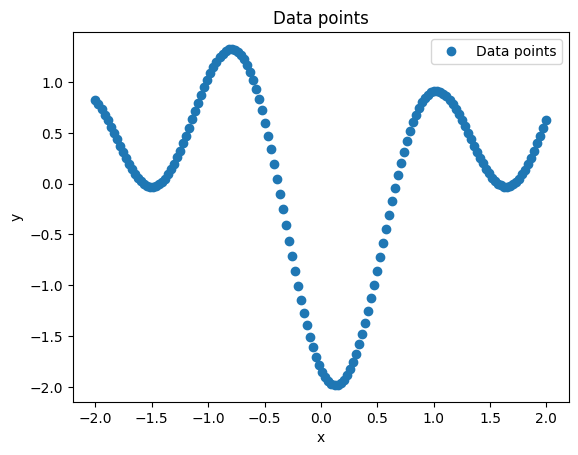

In [43]:
q = 2
m = 150
degree = 6

g_x = lambda x: 2*np.sin(3*x-2)*np.cos(x)

a, b, c = generate_data(q, m, g_x, degree=degree)
plt.plot(a, b, 'o', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points')
plt.legend()
plt.show()

### Applying steepest descent

After 526505 iterations


'x \\left(x \\left(x \\left(x \\left(x \\left(0.438210984416841 x - 0.191634188889215\\right) - 2.73007115354739\\right) + 0.973906310263399\\right) + 4.62357205776365\\right) - 1.1118228266944\\right) - 1.38087978051283'

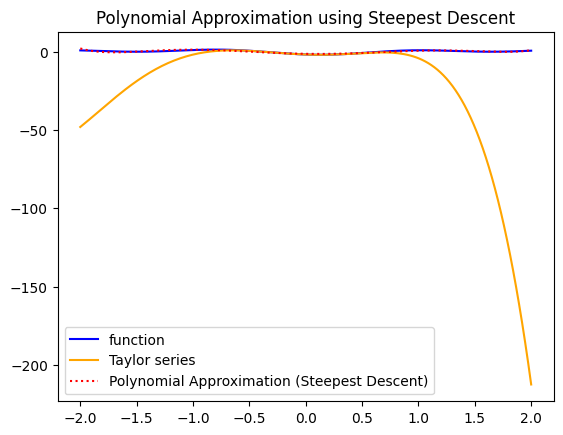

In [44]:
q = 2
m = 150
degree = 6

# Approximate the function using a polynomial of degree 4
g_x = lambda x: 2*np.sin(3*x-2)*np.cos(x)

a, b, c = generate_data(q, m, g_x, degree=degree)
initial_x = np.ones(degree+1)
final_coeffs_sd, itr = steepest_descent_task2(x=initial_x, c=c, b=b,alpha= 1,tol= 10**-3,rho=0.5,max_iter=np.inf)
sd_polynomial = np.poly1d(final_coeffs_sd[::-1])
print(f"After {itr} iterations")

# Calculating the taylor series expansion of the function
x = sp.symbols('x')
g_x_symp = lambda x: 2*sp.sin(3*x-2)*sp.cos(x)
func = g_x_symp(x)  # Function to expand
taylor_expansion = taylor_series_expansion(func, x, 0, degree)
taylor_vals = [taylor_expansion.subs(x, val) for val in a]

aprrximation_in_latex = sp.latex(sd_polynomial(x))
display(aprrximation_in_latex)
# Plot the data points and the polynomial approximation
plt.plot(a, b, label="function", color='blue')
plt.plot(a, taylor_vals, label='Taylor series', color='orange')
plt.plot(a, sd_polynomial(a), label="Polynomial Approximation (Steepest Descent)", linestyle=':',color='red')
plt.title("Polynomial Approximation using Steepest Descent")
plt.legend()
plt.show() 

The approximation using SD is $$\^g(x)=x \left(x \left(x \left(x \left(x \left(0.438210984416841 x - 0.191634188889215\right) - 2.73007115354739\right) + 0.973906310263399\right) + 4.62357205776365\right) - 1.1118228266944\right) - 1.38087978051283$$


### Applying Newton Method

'x \\left(x \\left(x \\left(x \\left(x \\left(0.438249496508156 x - 0.191634188931623\\right) - 2.73029948735251\\right) + 0.973906310472263\\right) + 4.62391839008827\\right) - 1.1118228269097\\right) - 1.3809651383053'

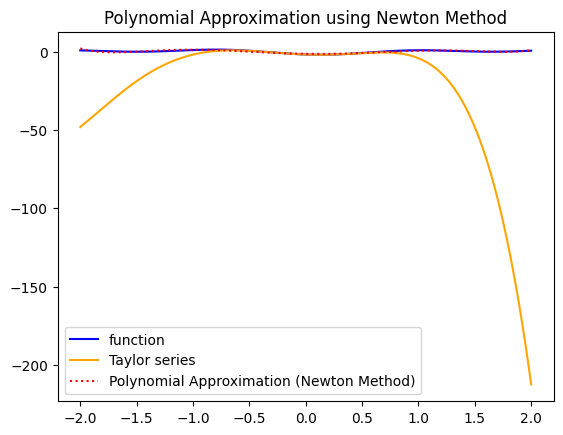

In [45]:
q = 2
m = 150
degree = 6
g_x = lambda x: 2*np.sin(3*x-2)*np.cos(x)
a, b, c = generate_data(q, m, g_x, degree=degree)
initial_x = np.ones(degree+1)
final_coeffs_nm = newton_method_task2(c, initial_x, b, 1e-6)
nm_polynomial = np.poly1d(final_coeffs_nm[::-1])

# Calculating the taylor series expansion of the function
x = sp.symbols('x')
g_x_symp = lambda x: 2*sp.sin(3*x-2)*sp.cos(x)
func = g_x_symp(x)  # Function to expand
taylor_expansion = taylor_series_expansion(func, x, 0, degree)
taylor_vals = [taylor_expansion.subs(x, val) for val in a]

aprrximation_in_latex = sp.latex(nm_polynomial(x))
display(aprrximation_in_latex)

# Plot the data points and the polynomial approximation
plt.plot(a, b, label="function", color='blue')
plt.plot(a, taylor_vals, label='Taylor series', color='orange')
plt.plot(a, nm_polynomial(a), label="Polynomial Approximation (Newton Method)", linestyle=':',color='red')
plt.title("Polynomial Approximation using Newton Method")
plt.legend()
plt.show()

The approximation using NM is $$\^g(x)=x \left(x \left(x \left(x \left(x \left(0.438249496508156 x - 0.191634188931623\right) - 2.73029948735251\right) + 0.973906310472263\right) + 4.62391839008827\right) - 1.1118228269097\right) - 1.3809651383053$$


# Tasks 21-25

Here I declared same functions as before but with some modifications and other helper function. And also the 5 problems  $[5, 8, 12, 20, 30]$
These Problems are going to be solve in the following parts

In [46]:
def hilbert_matrix(n):
    """Generate an n x n Hilbert matrix."""
    return np.array([[1.0 / (i + j - 1) for j in range(1, n+1)] for i in range(1, n+1)])

def quadratic_function(x, Q, b):
    """Compute the quadratic function f(x) = 0.5 * x^T Q x - b^T x."""
    return 0.5 * np.dot(x.T, np.dot(Q, x)) - np.dot(b.T, x)
def gradient(x, Q, b):
    """Compute the gradient of the quadratic function at x."""
    return np.dot(Q, x) - b

# Sizes for the quadratic problems
sizes = [5, 8, 12, 20, 30]

# Define the problems
problems = {}
for n in sizes:
    Q = hilbert_matrix(n)
    b = np.ones(n)
    problems[n] = {'Q': Q, 'b': b}


#print(f"x_star is {np.linalg.solve(problems[5]['Q'],problems[5]['b'])}")

# Steepest Descent Method
def steepest_descent(Q, b, x0,x_star,number, tol, max_iter):
    x = x0
    grad = gradient(x, Q, b)
    itr = 0
    condition=[]
    while np.linalg.norm(grad) > tol and itr <= max_iter:
        alpha=(grad.T@grad)/(grad.T@Q@grad)
        pk = grad
        diff=np.linalg.norm(x-x_star,2)
        if diff <= (number**2) *diff:
            condition.append(True)
        x -= alpha * pk
        grad = gradient(x, Q, b)
        itr += 1
    return x, itr,np.array(condition)


## 1. Problem

In [47]:
x0 = np.zeros(5)
Q = problems[5]['Q']
b = problems[5]['b']
number= (np.linalg.eigvals(Q)[-1]-np.linalg.eigvals(Q)[0])/(np.linalg.eigvals(Q)[-1]+np.linalg.eigvals(Q)[0])
x_star = np.linalg.solve(Q, b)
x_telda, itr, conditions = steepest_descent(Q, b, x0,x_star=x_star,number=number, tol=1e-6, max_iter=np.inf)
print(f"number of iterations is {itr}")
print(f"Steepest Descent: x_telda = {x_telda}")
print(f"x_star is {np.linalg.solve(Q, b)}")
print(f"Steepest Descent: ||x - x*|| = {np.linalg.norm(x_telda - x_star)}")
print(f"||gradient|| = {np.linalg.norm(gradient(x_telda, Q, b))}")
print(f"eigenvalues of Q are {np.linalg.eigvals(Q)}")
print(f"the condition number of Q {np.linalg.eigvals(Q)[-1]/np.linalg.eigvals(Q)[0]}")
print(f"the number (lambda_max-lambda_min)/(lambda_max+lambda_min) is {number}")
print(f"the condition is {np.all(conditions)}")

number of iterations is 1494127
Steepest Descent: x_telda = [    4.99836331  -119.96906017   629.86579684 -1119.79658832
   629.90024304]
x_star is [    5.          -120.           630.         -1120.00000001
   630.        ]
Steepest Descent: ||x - x*|| = 0.2651380918553499
||gradient|| = 9.99994796814568e-07
eigenvalues of Q are [1.56705069e+00 2.08534219e-01 1.14074916e-02 3.05898040e-04
 3.28792877e-06]
the condition number of Q 2.0981636336641426e-06
the number (lambda_max-lambda_min)/(lambda_max+lambda_min) is -0.9999958036815373
the condition is True


Iterations are $1494127$
$$\~x = [    4.99836331  ,-119.96906017  ,629.86579684 ,-1119.79658832, 629.90024304]$$
$$x^*= [    5          ,-120           ,630         ,-1120.00000001,   630]$$
$$\Vert \~x - x^* \Vert =0.2651380918553499$$
$$\Vert \nabla f(x) \Vert =9.99994796814568e-07$$
$$\frac{\lambda_n-\lambda_1}{\lambda_n+\lambda_1}= -0.9999958036815373$$
Eigen values of $Q$ are $[1.56705069e+00, 2.08534219e-01, 1.14074916e-02, 3.05898040e-04,3.28792877e-06]$

The inequality (3.29) from Theorem 3.3 was satisfied all the time

## 2. Problem
I used a higher boundry for $\Vert \nabla f(x) \Vert \leq 10^{-3}$

In [49]:
x0 = np.zeros(8)
Q = problems[8]['Q']
b = problems[8]['b']
number= (np.linalg.eigvals(Q)[-1]-np.linalg.eigvals(Q)[0])/(np.linalg.eigvals(Q)[-1]+np.linalg.eigvals(Q)[0])
x_star = np.linalg.solve(Q, b)
x_telda, itr, conditions = steepest_descent(Q, b, x0,x_star=x_star,number=number, tol=1e-3, max_iter=np.inf)
print(f"number of iterations is {itr}")
print(f"Steepest Descent: x_telda = {x_telda}")
print(f"x_star is {np.linalg.solve(Q, b)}")
print(f"Steepest Descent: ||x - x*|| = {np.linalg.norm(x_telda - x_star)}")
print(f"||gradient|| = {np.linalg.norm(gradient(x_telda, Q, b))}")
print(f"eigenvalues of Q are {np.linalg.eigvals(Q)}")
print(f"the condition number of Q {np.linalg.eigvals(Q)[-1]/np.linalg.eigvals(Q)[0]}")
print(f"the number (lambda_max-lambda_min)/(lambda_max+lambda_min) is {number}")
print(f"the condition is {np.all(conditions)}")

number of iterations is 867037
Steepest Descent: x_telda = [   -3.27390039    98.72619302  -595.7313884    948.15322645
   351.83859621  -968.45857137 -1049.55351369  1259.42626245]
x_star is [-8.00000052e+00  5.04000025e+02 -7.56000030e+03  4.62000015e+04
 -1.38600004e+05  2.16216005e+05 -1.68168004e+05  5.14800010e+04]
Steepest Descent: ||x - x*|| = 314680.4463558783
||gradient|| = 0.000999999101201278
eigenvalues of Q are [1.69593900e+00 2.98125211e-01 2.62128436e-02 1.46768812e-03
 5.43694337e-05 1.29433209e-06 1.79887375e-08 1.11153896e-10]
the condition number of Q 6.554121130162634e-11
the number (lambda_max-lambda_min)/(lambda_max+lambda_min) is -0.9999999998689175
the condition is True


Iterations are $867037$
$$\~x = [     -3.27390039 ,   98.72619302,  -595.7313884    ,948.15322645,   351.83859621,  -968.45857137, -1049.55351369,  1259.42626245]$$
$$x^*= [  -8.00000052e+00 , 5.04000025e+02 ,-7.56000030e+03  ,4.62000015e+04,-1.38600004e+05 , 2.16216005e+05, -1.68168004e+05 , 5.14800010e+04]$$
$$\Vert \~x - x^* \Vert =314680.4463558783$$
$$\Vert \nabla f(x) \Vert =0.000999999101201278$$
Eigen values of $Q$ are $[1.69593900e+00, 2.98125211e-01, 2.62128436e-02, 1.46768812e-03, 5.43694337e-05, 1.29433209e-06, 1.79887375e-08, 1.11153896e-10]$
$$\frac{\lambda_n-\lambda_1}{\lambda_n+\lambda_1}= 6.554121130162634e-11$$

The inequality (3.29) from Theorem 3.3 was satisfied all the time

## 3. Problem
I used a higher boundry for $\Vert \nabla f(x) \Vert \leq 10^{-3}$

In [51]:
x0 = np.zeros(12)
Q = problems[12]['Q']
b = problems[12]['b']
number= (np.linalg.eigvals(Q)[-1]-np.linalg.eigvals(Q)[0])/(np.linalg.eigvals(Q)[-1]+np.linalg.eigvals(Q)[0])
x_star = np.linalg.solve(Q, b)
x_telda, itr, conditions = steepest_descent(Q, b, x0,x_star=x_star,number=number, tol=1e-3, max_iter=np.inf)
print(f"number of iterations is {itr}")
print(f"Steepest Descent: x_telda = {x_telda}")
print(f"x_star is {np.linalg.solve(Q, b)}")
print(f"Steepest Descent: ||x - x*|| = {np.linalg.norm(x_telda - x_star)}")
print(f"||gradient|| = {np.linalg.norm(gradient(x_telda, Q, b))}")
print(f"eigenvalues of Q are {np.linalg.eigvals(Q)}")
print(f"the condition number of Q {np.linalg.eigvals(Q)[-1]/np.linalg.eigvals(Q)[0]}")
print(f"the number (lambda_max-lambda_min)/(lambda_max+lambda_min) is {number}")
print(f"the condition is {np.all(conditions)}")

number of iterations is 2315283
Steepest Descent: x_telda = [ 2.28331721e+00 -8.76169267e+01  6.52976901e+02 -1.33495086e+03
 -1.04040223e+02  1.24510080e+03  1.19614044e+03  1.28230211e+01
 -1.34127681e+03 -1.86247813e+03 -7.67565393e+02  2.45367237e+03]
x_star is [-1.28758021e+01  1.82700490e+03 -6.35497518e+04  9.48423728e+05
 -7.55539458e+06  3.58352883e+07 -1.07176657e+08  2.07239527e+08
 -2.58446725e+08  2.00601048e+08 -8.81030636e+07  1.67194346e+07]
Steepest Descent: ||x - x*|| = 413345366.2113744
||gradient|| = 0.0009999995391225874
eigenvalues of Q are [1.79537206e+00 3.80275246e-01 4.47385488e-02 3.72231224e-03
 2.33089089e-04 1.11633575e-05 4.08237611e-07 1.12286107e-08
 2.25196455e-10 3.11135031e-12 2.64916347e-14 1.09723367e-16]
the condition number of Q 6.111455630099686e-17
the number (lambda_max-lambda_min)/(lambda_max+lambda_min) is -1.0
the condition is True


Iterations are $2315283$
$$\~x = \begin{pmatrix}2.28331721e+00 \\-8.76169267e+01 \\ 6.52976901e+02\\ -1.33495086e+03\\ -1.04040223e+02\\ 1.24510080e+03\\  1.19614044e+03\\  1.28230211e+01\\-1.34127681e+03\\ -1.86247813e+03\\ -7.67565393e+02\\  2.45367237e+03\end{pmatrix}$$
$$x^*= \begin{pmatrix}  -1.28758021e+01 \\ 1.82700490e+03\\ -6.35497518e+04\\  9.48423728e+05\\ -7.55539458e+06\\  3.58352883e+07\\ -1.07176657e+08\\  2.07239527e+08\\ -2.58446725e+08\\  2.00601048e+08\\ -8.81030636e+07\\  1.67194346e+07\end{pmatrix}$$
$$\Vert \~x - x^* \Vert =413345366.2113744$$
$$\Vert \nabla f(x) \Vert =0.0009999995391225874$$
Eigen values of $Q$ are $\begin{pmatrix}1.79537206e+00\\3.80275246e-01\\4.47385488e-02\\3.72231224e-03\\2.33089089e-04\\1.11633575e-05\\4.08237611e-07\\1.12286107e-08\\2.25196455e-10\\3.11135031e-12\\2.64916347e-14\\1.09723367e-16\end{pmatrix}$
$$\frac{\lambda_n-\lambda_1}{\lambda_n+\lambda_1}= -1.0$$

The inequality (3.29) from Theorem 3.3 was satisfied all the time

## 4. Problem
I used a higher boundry for $\Vert \nabla f(x) \Vert \leq 10^{-3}$

In [53]:
x0 = np.zeros(20)
Q = problems[20]['Q']
b = problems[20]['b']
number= (np.linalg.eigvals(Q)[-1]-np.linalg.eigvals(Q)[0])/(np.linalg.eigvals(Q)[-1]+np.linalg.eigvals(Q)[0])
x_star = np.linalg.solve(Q, b)
x_telda, itr, conditions = steepest_descent(Q, b, x0,x_star=x_star,number=number, tol=1e-3, max_iter=np.inf)
print(f"number of iterations is {itr}")
print(f"Steepest Descent: x_telda = {x_telda}")
print(f"x_star is {np.linalg.solve(Q, b)}")
print(f"Steepest Descent: ||x - x*|| = {np.linalg.norm(x_telda - x_star)}")
print(f"||gradient|| = {np.linalg.norm(gradient(x_telda, Q, b))}")
print(f"eigenvalues of Q are {np.linalg.eigvals(Q)}")
print(f"the condition number of Q {np.linalg.eigvals(Q)[-1]/np.linalg.eigvals(Q)[0]}")
print(f"the number (lambda_max-lambda_min)/(lambda_max+lambda_min) is {number}")
print(f"the condition is {np.all(conditions)}")

number of iterations is 4340243
Steepest Descent: x_telda = [-2.72204832e+00  9.93753060e+01 -7.26925891e+02  1.45616286e+03
  1.66157325e+02 -1.23978929e+03 -1.33774857e+03 -4.30731959e+02
  7.23174664e+02  1.52962803e+03  1.70996353e+03  1.25867043e+03
  3.50680075e+02 -7.44481988e+02 -1.72581700e+03 -2.30142841e+03
 -2.21152166e+03 -1.23920078e+03  7.86553861e+02  3.99254634e+03]
x_star is [-3.06198188e+01  5.79631108e+03 -2.67656855e+05  5.30590627e+06
 -5.62934738e+07  3.56180768e+08 -1.41454296e+09  3.54689896e+09
 -5.26881741e+09  3.31570124e+09  2.23492076e+09 -4.62144407e+09
 -4.79904240e+08  5.96741325e+09 -4.19120773e+09 -4.68358103e+08
  1.17802999e+09  4.13333400e+08 -7.15516924e+08  1.98562765e+08]
Steepest Descent: ||x - x*|| = 11642779517.357904
||gradient|| = 0.0009999999360102722
eigenvalues of Q are [ 1.90713472e+00  4.87038407e-01  7.55958213e-02  8.96112861e-03
  8.67671109e-04  7.03343147e-05  4.83051005e-06  2.82765206e-07
  1.41395476e-08  6.03609533e-10  2.1928

Iterations are $4340243$
$$\~x = \begin{pmatrix}-2.72204832e+00\\9.93753060e+01\\-7.26925891e+02\\1.45616286e+03\\1.66157325e+02\\-1.23978929e+03\\-1.33774857e+03\\-4.30731959e+02\\7.23174664e+02\\1.52962803e+03\\1.70996353e+03\\1.25867043e+03\\3.50680075e+02\\-7.44481988e+02\\-1.72581700e+03\\-2.30142841e+03\\-2.21152166e+03\\-1.23920078e+03\\7.86553861e+02\\3.99254634e+03\end{pmatrix}$$
$$x^*= \begin{pmatrix}  -3.06198188e+01\\5.79631108e+03\\-2.67656855e+05\\5.30590627e+06\\-5.62934738e+07\\3.56180768e+08\\-1.41454296e+09\\3.54689896e+09 \\-5.26881741e+09\\3.31570124e+09\\2.23492076e+09\\-4.62144407e+09\\-4.79904240e+08\\5.96741325e+09\\-4.19120773e+09\\-4.68358103e+08\\1.17802999e+09\\4.13333400e+08\\-7.15516924e+08\\1.98562765e+08\end{pmatrix}$$
$$\Vert \~x - x^* \Vert =11642779517.357904$$
$$\Vert \nabla f(x) \Vert =0.0009999999360102722$$
Eigen values of $Q$ are $\begin{pmatrix}1.90713472e+00\\4.87038407e-01\\7.55958213e-02\\8.96112861e-03\\8.67671109e-04\\7.03343147e-05\\4.83051005e-06\\2.82765206e-07\\1.41395476e-08\\6.03609533e-10\\2.19288997e-11\\6.74081634e-13\\1.73806120e-14\\3.71969535e-16\\8.42428748e-18\\1.35779278e-17\\-8.99026199e-18\\-5.32469246e-18\\-2.22817347e-18\\2.03544571e-18\end{pmatrix}$
$$\frac{\lambda_n-\lambda_1}{\lambda_n+\lambda_1}= -1.0$$

The inequality (3.29) from Theorem 3.3 was satisfied all the time

## 5. Problem
I used a higher boundry for $\Vert \nabla f(x) \Vert \leq 10^{-3}$

In [55]:
x0 = np.zeros(30)
Q = problems[30]['Q']
b = problems[30]['b']
number= (np.linalg.eigvals(Q)[-1]-np.linalg.eigvals(Q)[0])/(np.linalg.eigvals(Q)[-1]+np.linalg.eigvals(Q)[0])
x_star = np.linalg.solve(Q, b)
x_telda, itr, conditions = steepest_descent(Q, b, x0,x_star=x_star,number=number, tol=1e-3, max_iter=np.inf)
print(f"number of iterations is {itr}")
print(f"Steepest Descent: x_telda = {x_telda}")
print(f"x_star is {np.linalg.solve(Q, b)}")
print(f"Steepest Descent: ||x - x*|| = {np.linalg.norm(x_telda - x_star)}")
print(f"||gradient|| = {np.linalg.norm(gradient(x_telda, Q, b))}")
print(f"eigenvalues of Q are {np.linalg.eigvals(Q)}")
print(f"the condition number of Q {np.linalg.eigvals(Q)[-1]/np.linalg.eigvals(Q)[0]}")
print(f"the number (lambda_max-lambda_min)/(lambda_max+lambda_min) is {number}")
print(f"the condition is {np.all(conditions)}")

number of iterations is 8311999
Steepest Descent: x_telda = [ 1.84868199e+00 -8.17550933e+01  7.06495392e+02 -1.75536010e+03
  3.46987409e+02  1.67051420e+03  1.16693857e+03 -1.83500304e+02
 -1.36407673e+03 -1.87051898e+03 -1.64790297e+03 -8.93627375e+02
  1.07926313e+02  1.08746687e+03  1.84045749e+03  2.24263261e+03
  2.24644006e+03  1.86854512e+03  1.17446002e+03  2.63567285e+02
 -7.43932108e+02 -1.71761745e+03 -2.52500017e+03 -3.03748880e+03
 -3.13452129e+03 -2.70622850e+03 -1.65496088e+03  1.04037520e+02
  2.64257491e+03  6.01989207e+03]
x_star is [-7.38898057e+00  1.29458953e+03 -5.61474444e+04  1.04348302e+06
 -1.02301475e+07  5.81227384e+07 -1.96232569e+08  3.64915895e+08
 -1.79264380e+08 -8.39801233e+08  2.46029802e+09 -3.56471316e+09
  3.17883390e+09 -1.58026202e+09  4.22652547e+08 -8.73069475e+08
  1.92059360e+09 -2.32383289e+09  1.67700541e+09  3.69711732e+08
 -1.88124738e+09  6.77351644e+08  6.19008839e+08  2.55294180e+08
 -2.14299192e+08 -1.97463933e+09  2.50360185e+09 -5

Iterations are $8311999$
$$\~x = \begin{pmatrix}1.84868199e+00\\-8.17550933e+01\\7.06495392e+02\\-1.75536010e+03
\\3.46987409e+02\\1.67051420e+03\\1.16693857e+03\\-1.83500304e+02
\\-1.36407673e+03\\-1.87051898e+03\\-1.64790297e+03\\-8.93627375e+02
\\1.07926313e+02\\1.08746687e+03\\1.84045749e+03\\2.24263261e+03
\\2.24644006e+03\\1.86854512e+03\\1.17446002e+03\\2.63567285e+02
\\-7.43932108e+02\\-1.71761745e+03\\-2.52500017e+03\\-3.03748880e+03
\\-3.13452129e+03\\-2.70622850e+03\\-1.65496088e+03\\1.04037520e+02
\\2.64257491e+03\\6.01989207e+03\end{pmatrix}$$
$$x^*= \begin{pmatrix} -7.38898057e+00\\1.29458953e+03\\-5.61474444e+04\\1.04348302e+06
\\-1.02301475e+07\\5.81227384e+07\\-1.96232569e+08\\3.64915895e+08
\\-1.79264380e+08\\-8.39801233e+08\\2.46029802e+09\\-3.56471316e+09
\\3.17883390e+09\\-1.58026202e+09\\4.22652547e+08\\-8.73069475e+08
\\1.92059360e+09\\-2.32383289e+09\\1.67700541e+09\\3.69711732e+08
\\-1.88124738e+09\\6.77351644e+08\\6.19008839e+08\\2.55294180e+08
\\-2.14299192e+08\\-1.97463933e+09\\2.50360185e+09\\-5.55570716e+08
\\-5.80671161e+08\\2.65455030e+08\end{pmatrix}$$
$$\Vert \~x - x^* \Vert =7786495329.09056$$
$$\Vert \nabla f(x) \Vert =0.00099999994575422$$
Eigen values of $Q$ are $\begin{pmatrix}1.98649257e+00+0.00000000e+00j\\5.72599933e-01+0.00000000e+00j\\1.05645646e-01+0.00000000e+00j\\1.54814913e-02+0.00000000e+00j\\1.92662077e-03+0.00000000e+00j\\2.08785073e-04+0.00000000e+00j\\1.99657536e-05+0.00000000e+00j\\1.69863217e-06+0.00000000e+00j\\1.29256307e-07+0.00000000e+00j\\8.82800065e-09+0.00000000e+00j\\5.42358066e-10+0.00000000e+00j\\3.00081946e-11+0.00000000e+00j\\1.49579869e-12+0.00000000e+00j\\6.71440537e-14+0.00000000e+00j\\2.71308313e-15+0.00000000e+00j\\1.01722350e-16+0.00000000e+00j\\-1.02620167e-17+0.00000000e+00j\\1.07146118e-17+0.00000000e+00j\\7.28078195e-18+2.41674765e-19j\\7.28078195e-18-2.41674765e-19j\\-6.66388076e-18+6.17107066e-19j\\-6.66388076e-18-6.17107066e-19j\\-5.61610706e-18+0.00000000e+00j\\-3.08467517e-18+2.98072711e-18j\\-3.08467517e-18-2.98072711e-18j\\4.79560377e-18+0.00000000e+00j\\1.44481413e-18+1.48483935e-18j\\1.44481413e-18-1.48483935e-18j\\2.18298755e-18+0.00000000e+00j\\-1.79083977e-18+0.00000000e+00j\end{pmatrix}$
$$\frac{\lambda_n-\lambda_1}{\lambda_n+\lambda_1}= -0.9999999999999999+0j$$

The inequality (3.29) from Theorem 3.3 was satisfied all the time